# **Predicting selling price of the vehicle**

**Dataset Description:
The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.**

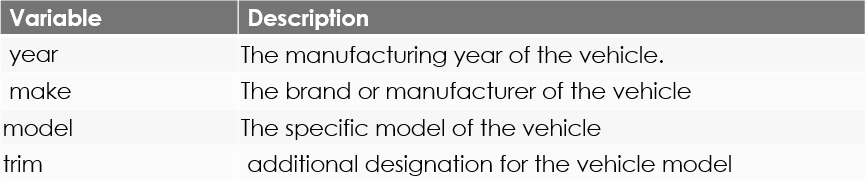

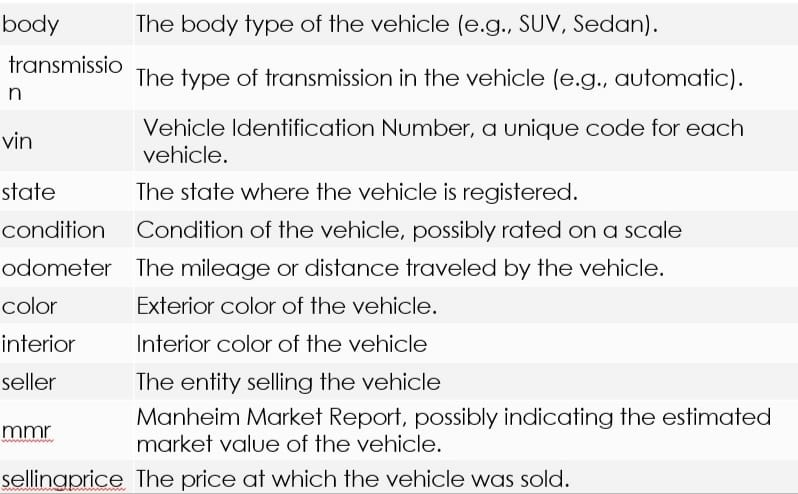

In [515]:
from IPython.display import Image, display

# Display the image
image_path = '/kaggle/input/image-data-dep/cap_data.jpg'  
display(Image(filename=image_path))

image_path = '/kaggle/input/data-dep-image/cap.jpg' 
display(Image(filename=image_path))

# Importing Essential Libraries & Dataset

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-sales-data/car_prices.csv
/kaggle/input/image-data-dep/cap_data.jpg
/kaggle/input/image-data-dep/cap_data_dep.jpg
/kaggle/input/data-dep-image/cap.jpg


In [517]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

In [518]:
df.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


# Exploratory Data Analysis

In [520]:
df.select_dtypes(include=np.number).columns

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')

In [521]:
df.select_dtypes(exclude=np.number).columns

Index(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')

### 5 Point Summary of Numerical Variables

In [522]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


### Summary of Categorical Variables

In [523]:
df.describe(exclude=np.number).T

,count,unique,top,freq
make,548536,96,Ford,93554
model,548438,973,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
transmission,493485,4,automatic,475915
vin,558833,550297,automatic,22
state,558837,64,fl,82945
color,558088,46,black,110970
interior,558088,17,black,244329
seller,558837,14263,nissan-infiniti lt,19693


# Univariate Analysis

## Categorical Variables

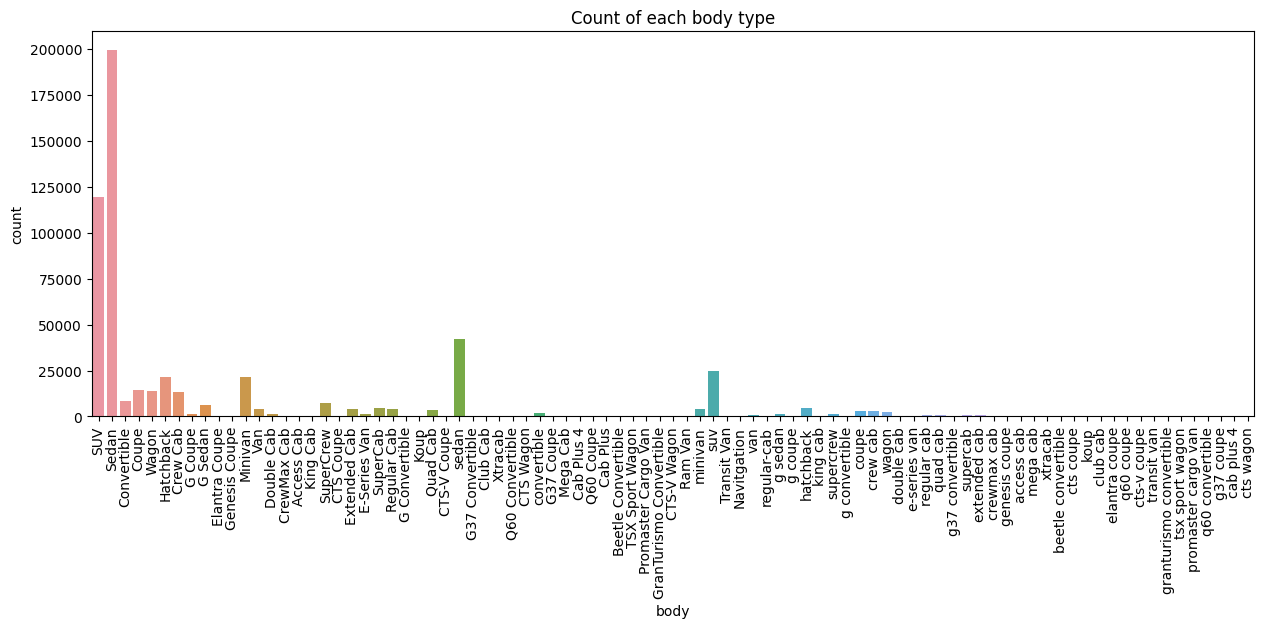

In [524]:
plt.figure(figsize=(15,5));
sns.countplot(x=df.body);
plt.xticks(rotation=90);
plt.title('Count of each body type');

### There seems to be an issue of case sensitive characters in the data which we will clean later.
### Sedan and SUV seem to be most popular body types.

### The following count plots have been capped at top 40 values each because they contain way too many values to be effectively visualized

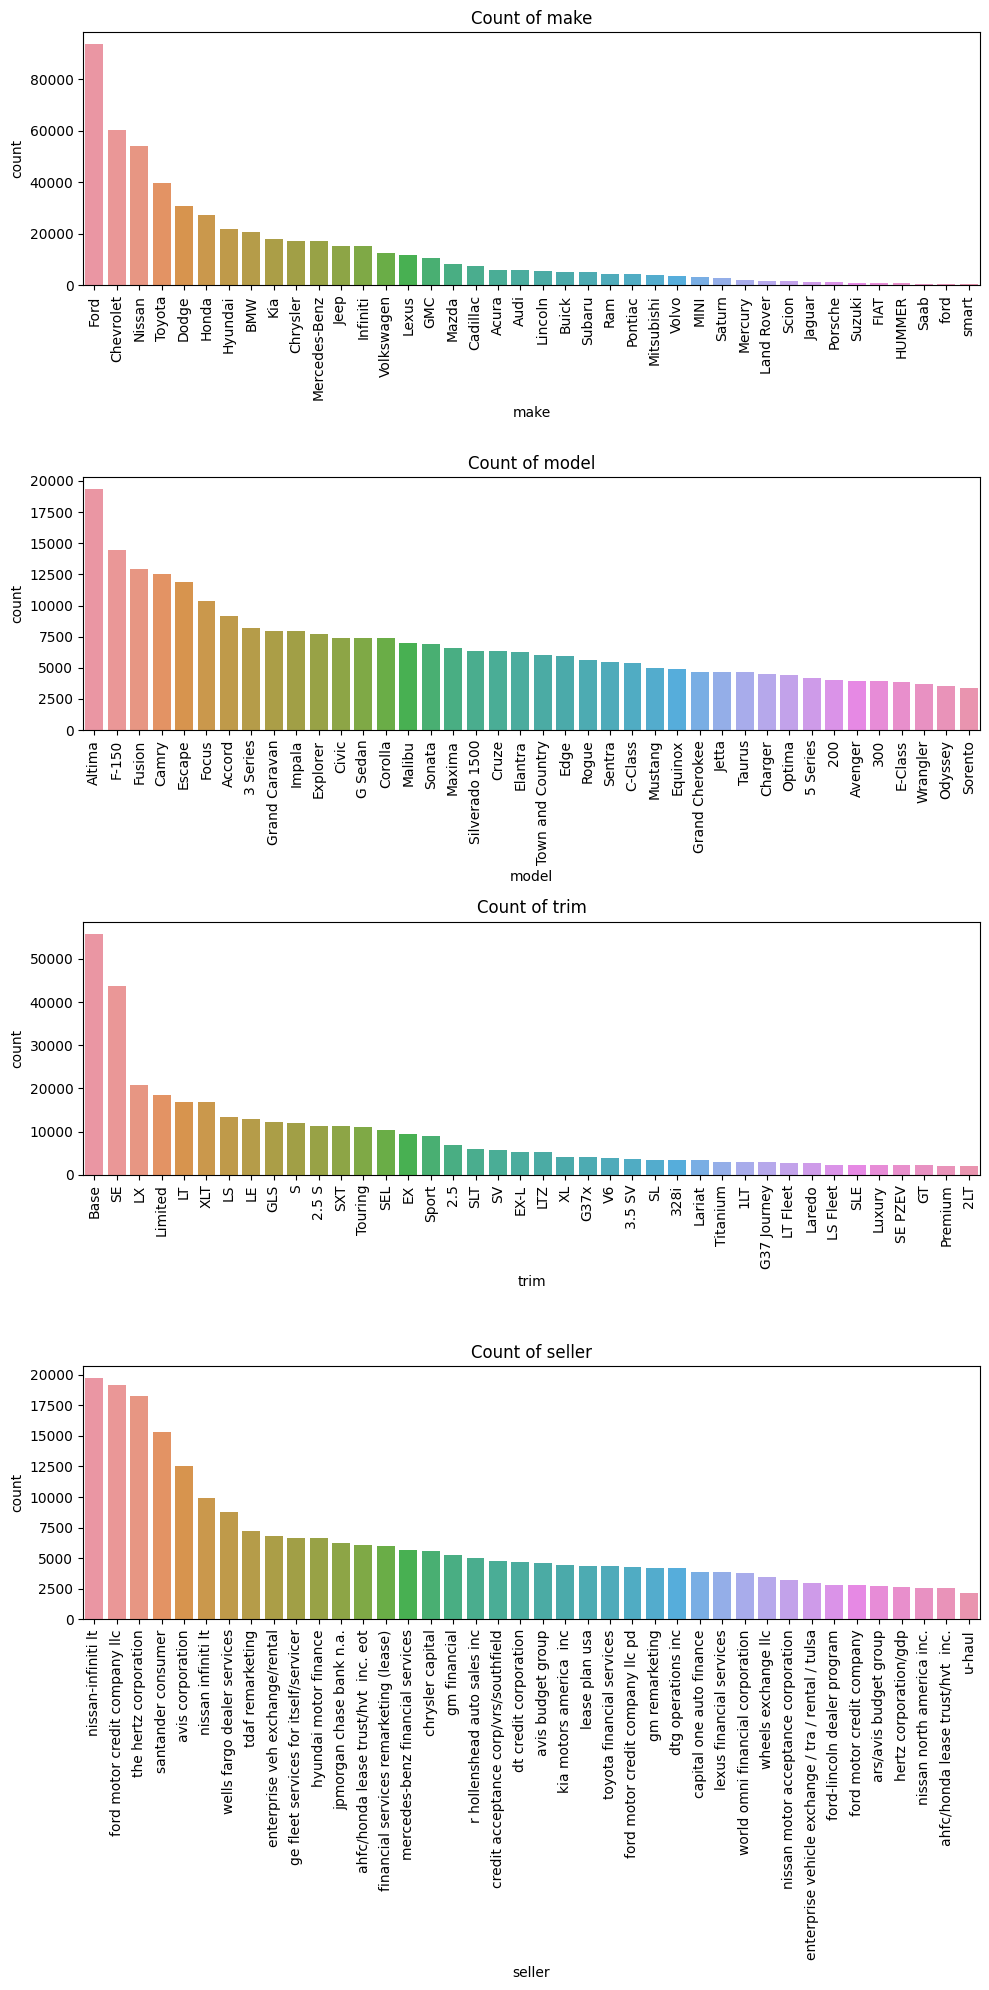

In [525]:
j=1
plt.figure(figsize=(10,20))
for i in ['make', 'model', 'trim', 'seller']:
    plt.subplot(4,1,j)
    sns.barplot(x = df[i].value_counts().index[0:40], y=df[i].value_counts()[0:40]);
    plt.xticks(rotation=90);
    plt.title(f'Count of {i}')
    plt.tight_layout();
    j+=1

In [526]:
df.seller.value_counts()

seller
nissan-infiniti lt               19693
ford motor credit company llc    19162
the hertz corporation            18299
santander consumer               15285
avis corporation                 12540
                                 ...  
whitney motor company                1
auto max sales inc                   1
lscg fund 19 llc                     1
lexus of santa fe                    1
i -5 uhlmann rv                      1
Name: count, Length: 14263, dtype: int64

#### There are 14263 different sellers in this data

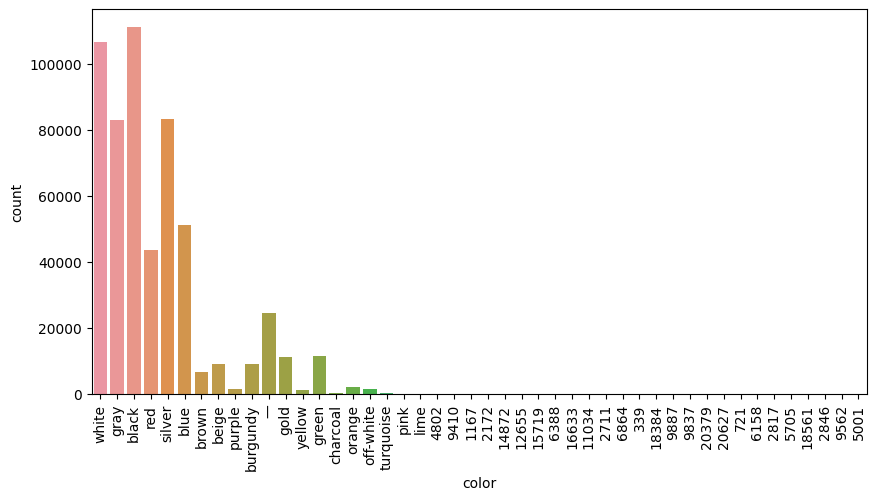

In [527]:
plt.figure(figsize=(10,5));
sns.countplot(x=df.color);
plt.xticks(rotation=90);

#### There are some garbage characters in the column 'color'
#### The countplot of the above column color shows us that the top 5 popular colors when it comes to cars are as follows
#### 1 - Black
#### 2 - White
#### 3 - Silver
#### 4 - Gray
#### 5 - Red

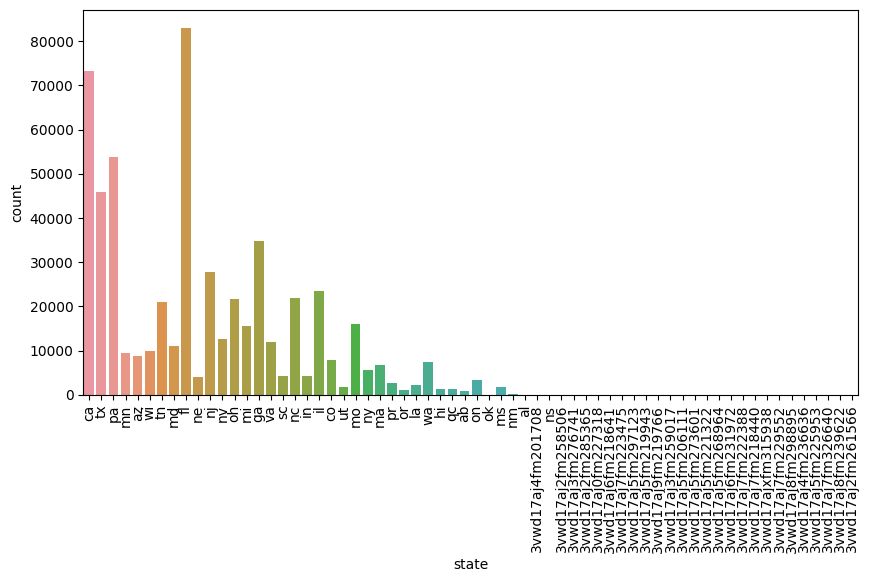

In [528]:
plt.figure(figsize=(10,5));
sns.countplot(x=df.state);
plt.xticks(rotation=90);

### It can be observed that there are a lot of garbage characters in the column 'state'

In [529]:
print('Top 5 state according to the figure and value counts is as below')
df.state.value_counts(ascending=False).head()

Top 5 state according to the figure and value counts is as below


state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
Name: count, dtype: int64

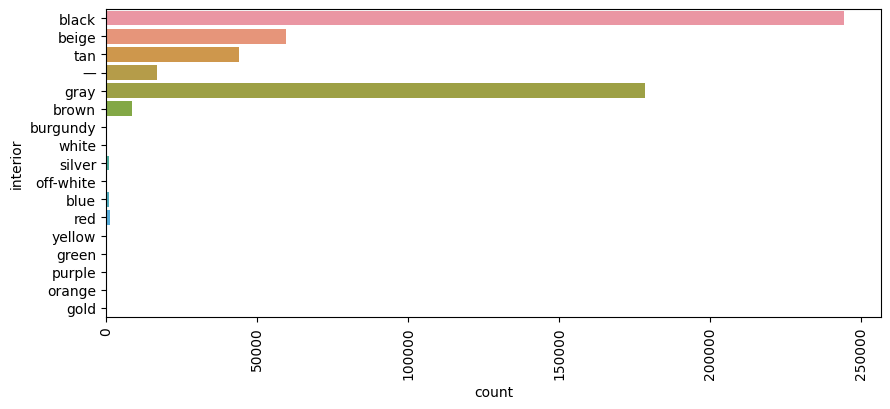

In [530]:
plt.figure(figsize=(10,4));
sns.countplot(y=df['interior']);
plt.xticks(rotation=90);

### We can identify from the above plot that there is a garbage value in the column 'interior' which have to be treated.

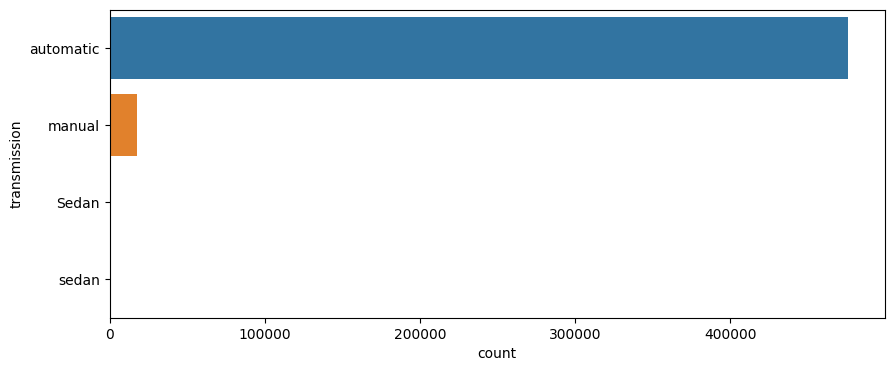

In [531]:
plt.figure(figsize=(10,4));
sns.countplot(y=df.transmission);

### Within the column transmission, the value 'sedan' belongs to the column 'body' so we will have to further check the column for data discrepency

## Numerical Variables

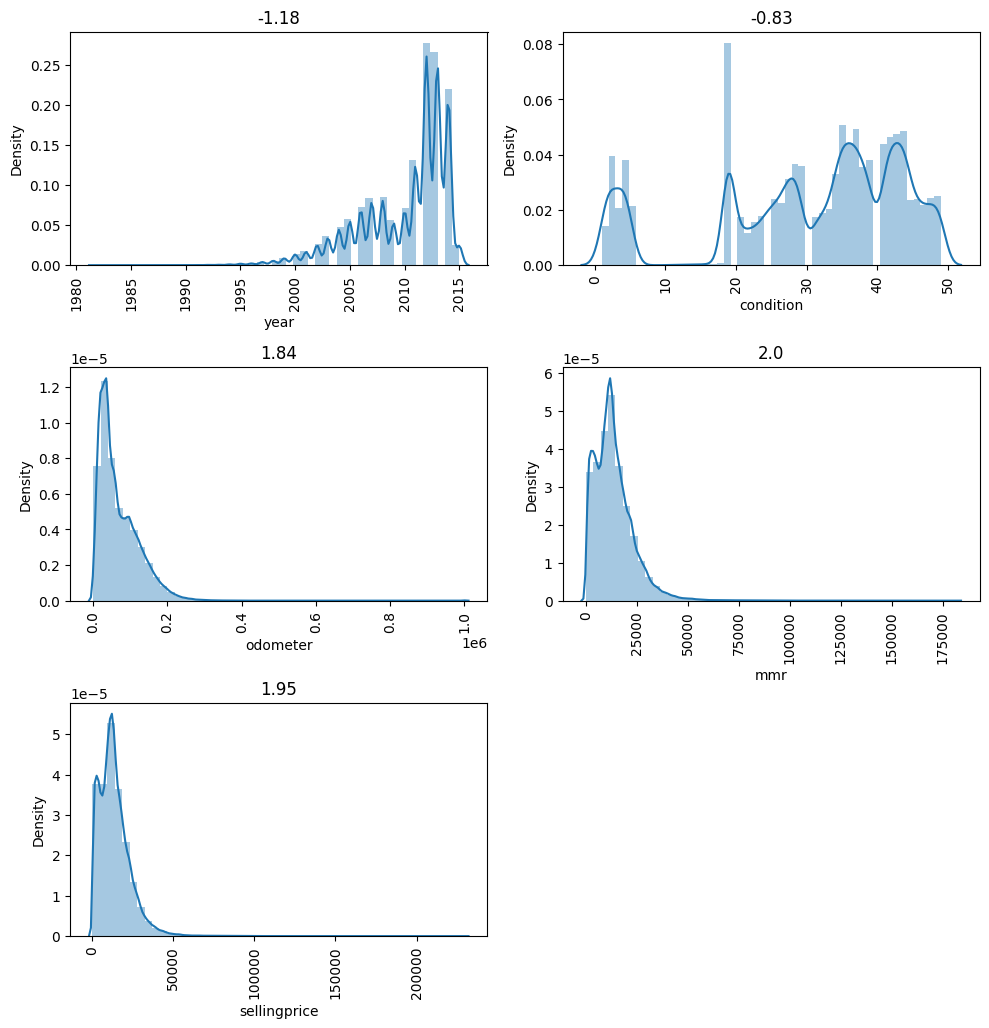

In [532]:
j=1
plt.figure(figsize=(10,10))
for i in ['year', 'condition', 'odometer', 'mmr', 'sellingprice']:
    plt.subplot(3,2,j)
    sns.distplot(df[i]);
    plt.tight_layout()
    plt.xticks(rotation=90);
    plt.title(np.round(df[i].skew(),2))
    j+=1

### Year and Condition have missing values at unusual frequencies. We will further examine these two columns.
### Odometer, MMR & Selling Price are right skewed and there seems to be no discrepency in distribution of these columns.

In [533]:
np.array(sorted(df.year.unique()))

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

### By looking at visualization, it looked like there were no values for certain years but by checking the data for unique year values, we can notice that there is some data available for every year, its just that the data for some particular years is very less

In [534]:
df.condition.value_counts().sort_index()

condition
1.0      7364
2.0     20790
3.0     10803
4.0     19922
5.0     11222
11.0       87
12.0       95
13.0       82
14.0      134
15.0      144
16.0      178
17.0      243
18.0      323
19.0    42281
21.0     9199
22.0     6057
23.0     8188
24.0     9326
25.0    12561
26.0    11912
27.0    16351
28.0    19178
29.0    18928
31.0     9222
32.0     9962
33.0    10619
34.0    17398
35.0    26750
36.0    23144
37.0    25938
38.0    18723
39.0    19920
41.0    23073
42.0    24328
43.0    24937
44.0    25514
45.0    12313
46.0    12634
47.0    11363
48.0    12712
49.0    13099
Name: count, dtype: int64

### The values in 'condition' column seem to be in two ranges i.e. 1-5 and 10-50
### We will be treating the same in bivariate analysis

# Bivariate Analysis

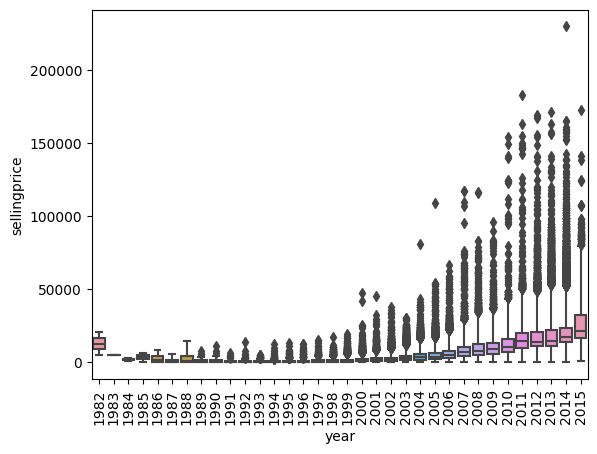

In [535]:
sns.boxplot(x=df.year, y=df.sellingprice, whis=3.0);
plt.xticks(rotation=90);

#### The selling price of older cars seems to be less which is a very obvious and ordinary situation in used car market

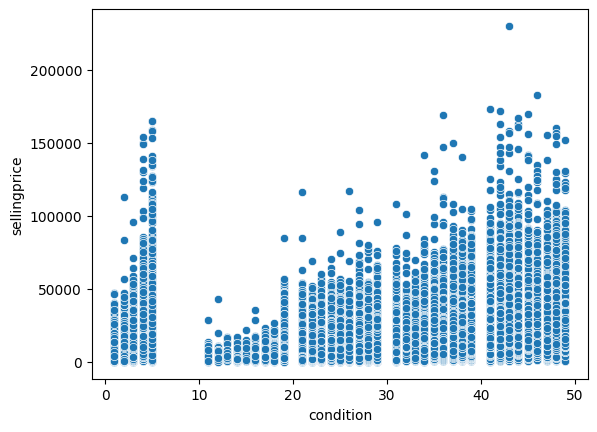

In [536]:
sns.scatterplot(x=df.condition, y=df.sellingprice);

#### There appears to be a positive relation between condition and selling price. This means that higher condition score has higher selling price.  There are also a few outliers which have have lower selling price despite high condition rating.
#### Some values within selling price are very close to 0, we will further examine this column when doing data cleaning.
#### We can also verify the fact there are two scales of data within a single column, which shall get fixed by changing the scale of either range.

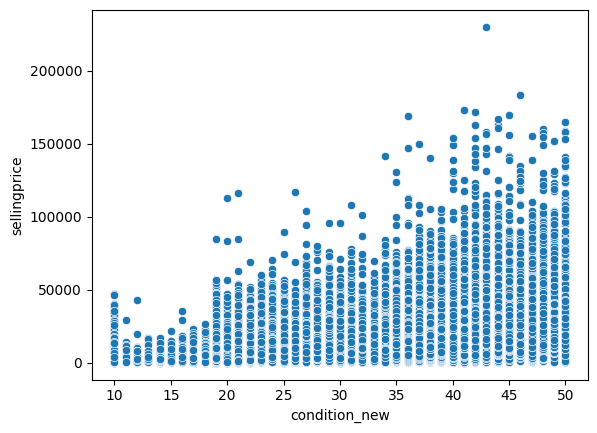

In [537]:
df['condition_new'] = np.where(df.condition<10, df.condition*10, df.condition)
sns.scatterplot(x=df.condition_new, y=df.sellingprice);

#### The change in scale for condition range 1-5 seems to have worked perfectly
#### There are no suspiciously missing values between dense data points after the treatment

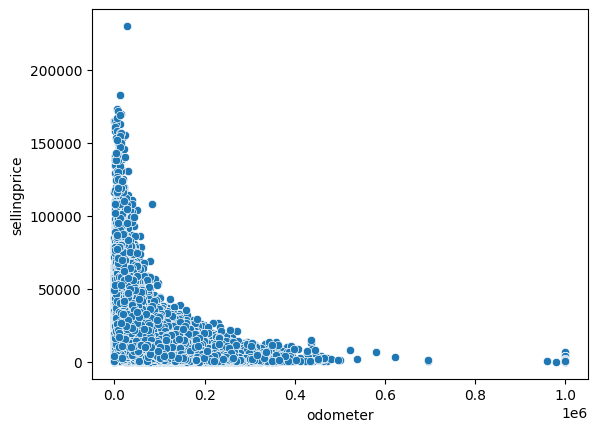

In [538]:
sns.scatterplot(x=df.odometer, y=df.sellingprice);

#### There appears to be a negative relation between odometer reading and selling price. This means that as the odometer reading (mileage) increases, the selling price tends to decrease.

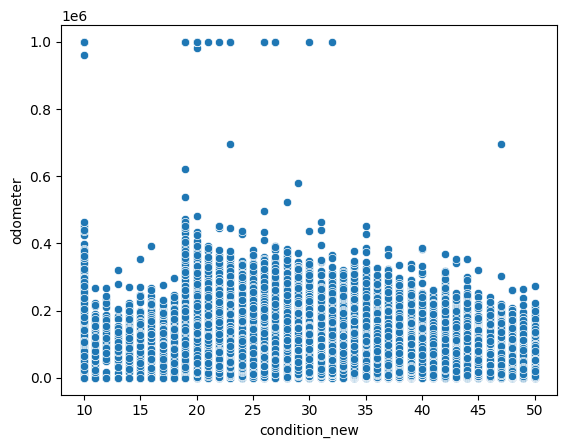

In [539]:
sns.scatterplot(x=df.condition_new, y=df.odometer);

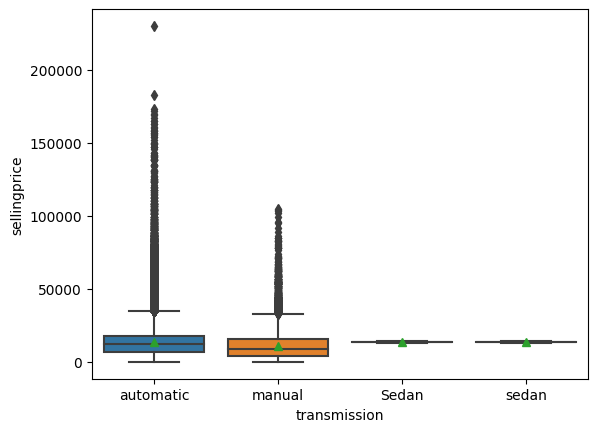

In [540]:
sns.boxplot(x=df.transmission, y=df.sellingprice, showmeans=True);

In [541]:
df.groupby(by='transmission').sellingprice.mean()

transmission
Sedan        13686.363636
automatic    13540.406866
manual       11211.448358
sedan        13650.000000
Name: sellingprice, dtype: float64

### The graph shows that cars with automatic transmissions have a higher average selling price than cars with manual transmission. The average selling price for a car with an automatic transmission is around 13,540, while the average selling price for a car with a manual transmission is around $11,211.

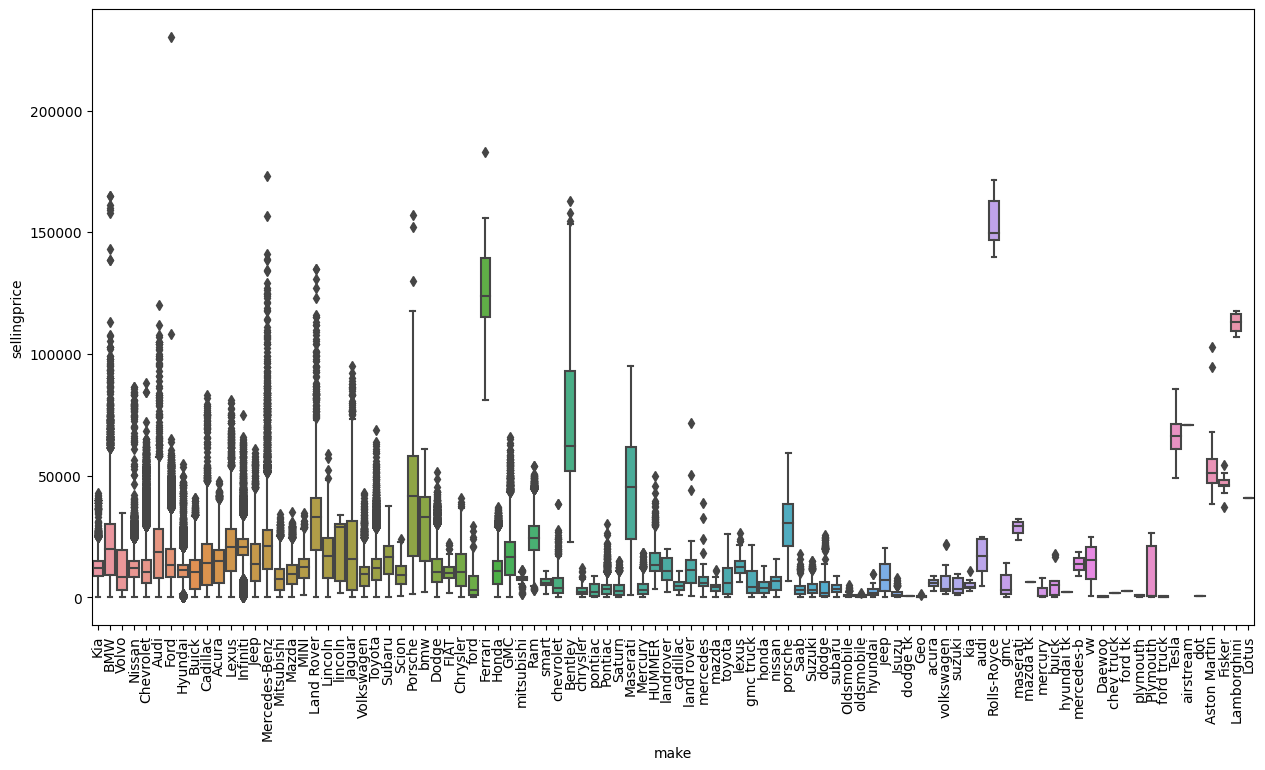

In [542]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.make, y=df.sellingprice)
plt.xticks(rotation=90);

#### Variations in price across makes: There is a significant variation in average selling price across different car makes. Some makes, like Lexus and Mercedes-Benz, tend to have higher average selling prices than others, like Kia and Hyundai. This likely reflects brand reputation, standard features, and performance differences.

#### Variations within makes: There are also variations in average selling price within each car make. For example, within the Lexus brand, the LS likely has a higher average selling price than the RX. This is likely due to differences in original price, model size, features, and performance.

# Data Cleaning

In [543]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10651
body             13195
transmission     65352
vin                  4
state                0
condition        11820
odometer            94
color              749
interior           749
seller               0
mmr                 38
sellingprice        12
saledate            12
condition_new    11820
dtype: int64

plt.figure(figsize=(20,30))
df['model'].value_counts().sort_values().plot(kind='barh')

## Finding case sensitive duplicates in the data

#### Finding & Fixing lower case duplicates in the feature 'Make'.

In [544]:
df['make'].nunique(), df['make'].str.lower().nunique()

(96, 66)

In [545]:
df['make']=df['make'].str.lower()

#### Finding & Fixing lower case duplicates in the feature 'Model'.

In [546]:
df['model'].nunique(), df['model'].str.lower().nunique()

(973, 851)

In [547]:
df['model']=df['model'].str.lower()

#### Finding & Fixing lower case duplicates in the feature 'Trim'.

In [548]:
df['trim'].nunique(), df['trim'].str.lower().nunique()

(1963, 1888)

In [549]:
df['trim']=df['trim'].str.lower()

#### Finding & Fixing lower case duplicates in the feature 'Body'.

In [550]:

df['body'].nunique(), df['body'].str.lower().nunique()

(87, 46)

In [551]:
df['body']=df['body'].str.lower()

## Garbage Values Treatment

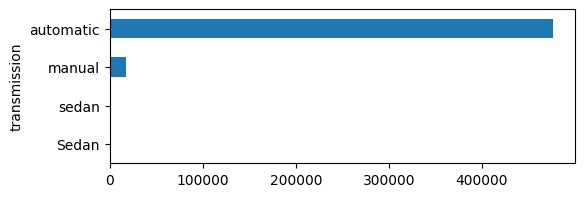

In [552]:
plt.figure(figsize=(6,2))
df['transmission'].value_counts().sort_values().plot(kind='barh');

In [553]:
df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new
408161,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,NaN
417835,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,NaN
421289,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,NaN
424161,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,NaN
427040,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,NaN
427043,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500,NaN
434424,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500,NaN
444501,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700,NaN
453794,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600,NaN
461597,2015,volkswagen,jetta,se pzev w/connectivity,navitgation,Sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000,NaN


In [554]:
df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')].index

Index([408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],
      dtype='int64')

###### Indexes of garbage characters.

In [555]:
[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710]

[408161,
 417835,
 421289,
 424161,
 427040,
 427043,
 434424,
 444501,
 453794,
 461597,
 461612,
 492484,
 497008,
 497011,
 499083,
 501455,
 505299,
 505306,
 520461,
 528996,
 529009,
 529013,
 529622,
 548784,
 551222,
 554710]

#### Garbage in feature 'Trim'.

In [556]:
df.loc[df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')].index,'trim']=np.nan

#### Garbage in feature 'Body'.

In [557]:
df.loc[df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')].index,'body']=df.loc[df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')].index,'transmission']

#### Garbage in feature 'Transmission'.

In [558]:
df.loc[df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')].index,'transmission']=df.loc[df.loc[(df['transmission']=='sedan') | (df['transmission']=='Sedan')].index,'vin']

#### Garbage in feature 'Vin'.

In [559]:
df.loc[df['vin']=='automatic','vin']=df.loc[df['vin']=='automatic','state']

In [560]:
df.loc[df['vin']=='automatic']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new


In [561]:
df.loc[df['vin'].isnull(),'vin']=df.loc[df['vin'].isnull(),'state']

In [562]:
df.vin.isnull().sum()

0

In [563]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710]]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new
408161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj4fm201708,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,NaN
417835,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm258506,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,NaN
421289,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj3fm276741,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,NaN
424161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm285365,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,NaN
427040,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj0fm227318,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,NaN
427043,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj6fm218641,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500,NaN
434424,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj7fm223475,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500,NaN
444501,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm297123,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700,NaN
453794,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm219943,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600,NaN
461597,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj9fm219766,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000,NaN


#### Garbage in feature 'State'.

In [564]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'state']=np.nan

In [565]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710]]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new
408161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj4fm201708,NaN,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,NaN
417835,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm258506,NaN,NaN,1.0,9410,white,gray,NaN,13300.0,10500,NaN
421289,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj3fm276741,NaN,NaN,46.0,1167,blue,black,NaN,13200.0,12700,NaN
424161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm285365,NaN,NaN,1.0,2172,gray,black,NaN,14050.0,8250,NaN
427040,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj0fm227318,NaN,NaN,41.0,14872,gray,black,NaN,13700.0,14300,NaN
427043,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj6fm218641,NaN,NaN,49.0,12655,red,black,NaN,13850.0,14500,NaN
434424,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj7fm223475,NaN,NaN,46.0,15719,blue,black,NaN,13650.0,13500,NaN
444501,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm297123,NaN,NaN,2.0,6388,white,black,NaN,13850.0,10700,NaN
453794,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm219943,NaN,NaN,44.0,16633,silver,black,NaN,13600.0,13600,NaN
461597,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj9fm219766,NaN,NaN,44.0,11034,black,black,NaN,13900.0,13000,NaN


#### Garbage in feature 'Condition'.

In [566]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'condition']=df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'odometer']

#### Garbage in feature 'Odometer'.

In [567]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'odometer']=df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'color']

In [568]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710]]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new
408161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,4802,silver,gray,NaN,13200.0,16500,NaN
417835,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,9410,white,gray,NaN,13300.0,10500,NaN
421289,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,1167,blue,black,NaN,13200.0,12700,NaN
424161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,2172,gray,black,NaN,14050.0,8250,NaN
427040,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,14872,gray,black,NaN,13700.0,14300,NaN
427043,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,12655,red,black,NaN,13850.0,14500,NaN
434424,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,15719,blue,black,NaN,13650.0,13500,NaN
444501,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,6388,white,black,NaN,13850.0,10700,NaN
453794,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,16633,silver,black,NaN,13600.0,13600,NaN
461597,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,11034,black,black,NaN,13900.0,13000,NaN


#### Garbage in feature 'Color'.

In [569]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'color']=df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'interior']

In [570]:
df.loc[df['color']=='—','color']=np.nan

#### Garbage in feature 'Interior'.

In [571]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'interior']=df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'seller']

In [572]:
df.loc[df['interior']=='—','interior']=np.nan

#### Garbage in feature 'Seller'.

In [573]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'seller']=np.nan
       

#### Garbage in feature 'MMR'.

In [574]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'mmr']=df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'saledate']

#### Garbage in feature 'Saledate'.

In [575]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710],'saledate']=np.nan
       

In [576]:
df.loc[[408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501, 453794,
       461597, 461612, 492484, 497008, 497011, 499083, 501455, 505299, 505306,
       520461, 528996, 529009, 529013, 529622, 548784, 551222, 554710]]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new
408161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,16500,13200.0,NaN,NaN
417835,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,10500,13300.0,NaN,NaN
421289,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,12700,13200.0,NaN,NaN
424161,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,8250,14050.0,NaN,NaN
427040,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,14300,13700.0,NaN,NaN
427043,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,14500,13850.0,NaN,NaN
434424,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13500,13650.0,NaN,NaN
444501,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,10700,13850.0,NaN,NaN
453794,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600,13600.0,NaN,NaN
461597,2015,volkswagen,jetta,NaN,Sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13000,13900.0,NaN,NaN


In [577]:
#df['sd_new']=pd.to_datetime(df['saledate'],format="%Y-%m-%d %H:%M:%S%z",errors='coerce',utc=True)

In [578]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11794
odometer            94
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
dtype: int64

### Null Value Treatment.

#### Feature : 'Make'.

In [579]:
df['vin_new']=df['vin'].str[0:3]

In [580]:
df['vin'].isnull().sum()

0

In [581]:
make=dict(df.groupby('vin_new')['make'].describe().top)

In [582]:
df['vin_new'].isnull().sum()

0

In [583]:
df['make_n']=np.where(df['make'].isnull()==True,df['vin_new'].map(make),df['make'])

In [584]:
df['make_n'].isnull().sum()

22

In [585]:
df.loc[df['vin_new']=='1l1','make_n']='Lincoln'

In [586]:
df.loc[(df['vin_new']=='3d2') | (df['vin_new']=='3d6'),'make_n']='Chrysler'

In [587]:
df.loc[df['vin_new']=='wdy','make_n']='Daimler Chrysler'

In [588]:
df.loc[(df['vin_new']=='4gl') | (df['vin_new']=='1ge'),'make_n']='General Motors'

In [589]:
df.loc[(df['vin_new']=='1jc') | (df['vin_new']=='2j4') ,'make_n']='Jeep'

In [590]:
df.loc[df['vin_new']=='wda','make_n']='Mercedes Benz'

In [591]:
df.loc[df['vin_new']=='2fd','make_n']='Ford'

In [592]:
df['make_n'].isnull().sum()

0

In [593]:
df.loc[df['vin'].isnull()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new,vin_new,make_n


In [594]:
df['body']=df['body'].str.lower()

In [595]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11794
odometer            94
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
dtype: int64

#### Feature : 'Model'

In [596]:
df['vin_m']=df['vin'].str[3:8]

In [597]:
d_m=dict(df.groupby('vin_m')['model'].describe().top)

In [598]:
df['model_n']=np.where(df['model'].isnull()==True,df['vin_m'].map(d_m),df['model'])

In [599]:
df['model_n'].isnull().sum()

599

In [600]:
df.loc[df['model_n'].isnull()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new,vin_new,make_n,vin_m,model_n
2082,2011,NaN,NaN,NaN,NaN,automatic,1ftlr1fe5bpa06821,ca,NaN,1.0,white,NaN,onemain rem/e motorcars,18300.0,11500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),NaN,1ft,ford,lr1fe,NaN
5274,1989,NaN,NaN,NaN,NaN,automatic,1gccs14z3k8155622,ca,2.0,183460.0,blue,gray,purple heart services inc,925.0,300.0,Wed Feb 25 2015 07:10:00 GMT-0800 (PST),20.0,1gc,chevrolet,cs14z,NaN
14332,2009,NaN,NaN,NaN,NaN,manual,5y2sn67099z434736,nj,27.0,85378.0,red,black,route one corporation,7850.0,6300.0,Wed Jan 21 2015 01:30:00 GMT-0800 (PST),27.0,5y2,pontiac,sn670,NaN
14343,2009,NaN,NaN,NaN,NaN,NaN,1g2ar55h097235724,on,19.0,150898.0,black,gray,canadian auto remarketing,1175.0,2400.0,Thu Mar 05 2015 10:30:00 GMT-0800 (PST),19.0,1g2,pontiac,ar55h,NaN
21593,2006,NaN,NaN,NaN,NaN,automatic,3vwft71k06m849977,fl,19.0,136119.0,white,tan,david j leahy jr,4200.0,4700.0,Thu Jan 22 2015 08:00:00 GMT-0800 (PST),19.0,3vw,volkswagen,ft71k,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555993,2008,NaN,NaN,NaN,NaN,manual,3gnca33d68s722532,ny,48.0,88066.0,red,gray,evia auto sales inc,3875.0,3600.0,Thu Jun 18 2015 02:45:00 GMT-0700 (PDT),48.0,3gn,chevrolet,ca33d,NaN
556039,2008,NaN,NaN,NaN,NaN,automatic,1j4fz24108l653866,tx,4.0,95455.0,white,gray,whites auto sales llc,13650.0,13600.0,Thu Jun 18 2015 03:30:00 GMT-0700 (PDT),40.0,1j4,jeep,fz241,NaN
556338,2004,NaN,NaN,NaN,NaN,automatic,1hgen26574l000508,ca,33.0,73330.0,white,beige,fmgj inc,4200.0,4100.0,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT),33.0,1hg,honda,en265,NaN
557855,2000,NaN,NaN,NaN,NaN,automatic,1j4g248n0yc134219,tx,22.0,176566.0,burgundy,beige,onemain rem/auto access,1000.0,1300.0,Fri Jun 19 2015 04:00:00 GMT-0700 (PDT),22.0,1j4,jeep,g248n,NaN


#### Feature : 'Transmission'.

In [601]:
dict_transmission = dict(df.groupby('vin_m')['transmission'].describe().top)

In [602]:
df['trans_n']=np.where(df['transmission'].isnull()==True,df['vin_m'].map(dict_transmission),df['transmission'])

In [603]:
df.groupby('vin_m')['transmission'].describe()

,count,unique,top,freq
vin_m,,,,
0cvcg,9,1,automatic,9
0kvcg,8,1,automatic,8
0kveg,1,1,automatic,1
0kxcg,0,0,NaN,NaN
115sl,130,1,automatic,130
...,...,...,...,...
zy147,6,1,automatic,6
zy5g1,13,1,automatic,13
zy64a,4,1,automatic,4


In [604]:
df['trans_n'].isnull().sum()

561

In [605]:
df['trans_n'].value_counts()

trans_n
automatic    540340
manual        17936
Name: count, dtype: int64

In [606]:
df['transmission'].value_counts()

transmission
automatic    475937
manual        17544
Name: count, dtype: int64

#### Feature: 'Trim'

In [607]:
dict_trim = dict(df.groupby('vin_m')['trim'].describe().top)

In [608]:
df['trim_n']=np.where(df['trim'].isnull()==True,df['vin_m'].map(dict_trim),df['trim'])

In [609]:
df['trim_n'].isnull().sum()

1049

#### Feature : 'Body'

In [610]:
dict_body = dict(df.groupby('vin_m')['body'].describe().top)

In [611]:
df['body_n']=np.where(df['body'].isnull()==True,df['vin_m'].map(dict_body),df['body'])

In [612]:
df['body_n'].isnull().sum()

4847

In [613]:
df.groupby('condition')['sellingprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1.0,7367.0,3927.164789,4821.907563,1.0,600.0,1700.0,6100.0,47200.0
2.0,20796.0,5693.725861,5850.333370,1.0,1300.0,3700.0,8500.0,113000.0
3.0,10802.0,12275.285410,7886.403355,150.0,6500.0,11700.0,16700.0,96000.0
4.0,19922.0,17724.538902,8492.902644,300.0,12600.0,16500.0,20300.0,154000.0
5.0,11223.0,24723.715851,12492.645203,250.0,16800.0,22100.0,29500.0,165000.0
11.0,87.0,4504.482759,4471.085532,200.0,1350.0,3100.0,6900.0,29000.0
12.0,95.0,3820.789474,5090.187490,225.0,1350.0,2500.0,4725.0,43000.0
13.0,82.0,3554.878049,3373.440287,300.0,1325.0,2675.0,4925.0,17000.0
14.0,134.0,3323.880597,3083.723438,100.0,1250.0,2500.0,4075.0,17100.0


In [614]:
df['mmr']=df['mmr'].astype(float)

In [615]:
df.groupby('condition')['mmr'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1.0,7367.0,6628.624270,7004.943667,25.0,1250.00,3700.0,11100.00,77000.0
2.0,20796.0,7035.984083,6806.465050,25.0,1850.00,4675.0,10800.00,132000.0
3.0,10802.0,12642.172746,8013.970279,25.0,6825.00,12150.0,16950.00,93000.0
4.0,19922.0,17581.674782,8581.801467,300.0,12500.00,16450.0,20100.00,160000.0
5.0,11223.0,24232.604918,12482.482650,700.0,16425.00,21700.0,29000.00,176000.0
11.0,87.0,6404.885057,5746.459779,725.0,2462.50,4325.0,8825.00,40200.0
12.0,95.0,5407.631579,6063.530099,325.0,2300.00,4100.0,6212.50,52400.0
13.0,82.0,5428.658537,4192.043319,500.0,2481.25,4212.5,7837.50,21300.0
14.0,134.0,5216.977612,4780.253478,525.0,2300.00,3637.5,6325.00,33600.0


In [616]:
df['condition'].isnull().sum()

11794

In [617]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11794
odometer            94
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            4847
dtype: int64

In [618]:
df['mmr'].isnull().sum()

12

In [619]:
df['saledate'].isnull().sum()

38

In [620]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11794
odometer            94
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            4847
dtype: int64

#### Feature : 'Color'.

In [621]:
df.loc[(df['color'].isnull()) & (df['interior'].isnull())]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new,vin_new,make_n,vin_m,model_n,trans_n,trim_n,body_n
493,2013,mercedes-benz,m-class,ml350,suv,NaN,4jgda5jb6da160181,ca,NaN,32532.0,NaN,NaN,trade in solutions irvine,36100.0,34500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN,4jg,mercedes-benz,da5jb,m-class,automatic,ml350,suv
1723,2012,mercedes-benz,m-class,ml63 amg,suv,NaN,4jgda7eb0ca049551,ca,NaN,1.0,NaN,NaN,high bid trading co inc,69000.0,18500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),NaN,4jg,mercedes-benz,da7eb,m-class,automatic,ml63 amg,suv
1824,2011,bmw,m3,base,sedan,automatic,wbspm9c59be699111,ca,4.0,26406.0,NaN,NaN,financial services remarketing (lease),41100.0,42500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),40.0,wbs,bmw,pm9c5,m3,automatic,base,sedan
2257,2011,mercedes-benz,c-class,c350 sport,sedan,automatic,wddgf5gbxbr146489,ca,36.0,34961.0,NaN,NaN,mercedes-benz financial services,21400.0,21500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),36.0,wdd,mercedes-benz,gf5gb,c-class,automatic,c350 sport,sedan
2334,2011,mercedes-benz,cls-class,cls550,sedan,automatic,wdddj7cbxba169305,ca,35.0,27372.0,NaN,NaN,mercedes-benz usa,34500.0,30000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),35.0,wdd,mercedes-benz,dj7cb,cls-class,automatic,cls550,sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550197,2012,nissan,frontier,sv,crew cab,automatic,1n6ad0er2cc456064,tx,34.0,87082.0,NaN,NaN,fairway ford henderson,15050.0,15500.0,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),34.0,1n6,nissan,ad0er,frontier,automatic,sv,crew cab
553040,2011,ford,f-150,lariat,supercrew,automatic,1ftfw1et2bfa51808,tn,19.0,67302.0,NaN,NaN,midtown motors,26200.0,27500.0,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT),19.0,1ft,ford,fw1et,f-150,automatic,lariat,supercrew
553525,2014,chevrolet,equinox,ltz,suv,automatic,1gnaldek6ez103530,mo,48.0,24425.0,NaN,NaN,all star dodge chrysler jeep,24600.0,23900.0,Tue Jun 16 2015 04:00:00 GMT-0700 (PDT),48.0,1gn,chevrolet,aldek,equinox,automatic,ltz,suv
555065,2002,NaN,NaN,NaN,NaN,NaN,2fafp71w72x148609,nv,2.0,87217.0,NaN,NaN,purple heart services inc,1075.0,400.0,Thu Jun 18 2015 04:00:00 GMT-0700 (PDT),20.0,2fa,ford,fp71w,police,automatic,base,NaN


In [622]:
df.groupby('color')['interior'].describe().head(50)

,count,unique,top,freq
color,,,,
beige,8881,14,tan,2623
black,107797,16,black,61567
blue,49294,15,gray,20084
brown,6486,14,black,1980
burgundy,8672,14,black,2821
charcoal,470,8,black,265
gold,10831,14,beige,3925
gray,80490,15,black,41450
green,10863,12,gray,3769


In [623]:
df.groupby(by=['make_n','model_n','trans_n'])['color'].describe().head(50)

count unique       top freq
make_n           model_n         trans_n                              
Daimler Chrysler sprinter cargo  automatic     4      2     white    3
General Motors   uplander        automatic     2      2    silver    1
Lincoln          town car        automatic     5      3     black    2
acura            cl              automatic    92     10     black   24
                                 manual        4      4       red    1
                 ilx             automatic   131      7     black   44
                                 manual        9      5     black    3
                 integra         automatic    35      7    silver    9
                                 manual        8      5    silver    2
                 legend          automatic     9      3     white    5
                 mdx             automatic  1554     15     black  456
                                 manual        1      1  burgundy    1
                 rdx             automatic   417     11     black  120
                 rl              automatic   187     11     black   39
                 rlx             automatic    17      5     black    8
                 rsx             automatic    76      7    silver   22
                                 manual       75     10     black   16
                 tl              automatic  2078     14     black  613
                                 manual       32      8     black   12
                 tlx             automatic     1      1     white    1
                 tsx             automatic  1061     12     black  330
                                 manual       43      6     black   17
                 tsx sport wagon automatic    35      7     black   12
                 zdx             automatic    39      6     black   23
airstream        interstate      automatic     1      1     black    1
aston martin     db9             automatic     6      2     black    4
                 rapide          automatic     2      2     white    1
                 v8 vantage      automatic    11      4     black    6
                                 manual        5      3    silver    2
audi             a3              automatic   221      8     black   60
                                 manual       18      6     black    6
                 a4              automatic  2006     10     black  581
                                 manual      169     10     black   63
                 a5              automatic   299      9     white  109
                                 manual       21      5     black   11
                 a6              automatic   801     12     black  266
                                 manual        3      3     green    1
                 a7              automatic   134      9     black   45
                 a8              automatic   278     11     black  118
                 allroad         automatic    44      5     black   16
                 allroad quattro automatic    34      7    silver   10
                 q3              automatic     0      0       NaN  NaN
                 q5              automatic   514     10     black  174
                 q7              automatic   454     14     black  153
                 r8              automatic    25      6     black   11
                                 manual       10      5      gray    5
                 rs 4            manual        3      2      blue    2
                 rs 5            automatic    15      4     black    7
                 rs 6            automatic     8      3      gray    4
                 rs 7            automatic     8      5     black    3

In [624]:
df.groupby(by=['make_n','model_n','body_n','trans_n'])['color'].describe().head(50)

count unique  \
make_n           model_n         body_n          trans_n                  
Daimler Chrysler sprinter cargo  van             automatic     4      2   
General Motors   uplander        minivan         automatic     2      2   
Lincoln          town car        sedan           automatic     5      3   
acura            cl              coupe           automatic    92     10   
                                                 manual        4      4   
                 ilx             sedan           automatic   131      7   
                                                 manual        9      5   
                 integra         hatchback       automatic    22      6   
                                                 manual        5      3   
                                 sedan           automatic    13      7   
                                                 manual        3      3   
                 legend          sedan           automatic     9      3   
                 mdx             suv             automatic  1554     15   
                                                 manual        1      1   
                 rdx             suv             automatic   417     11   
                 rl              sedan           automatic   187     11   
                 rlx             sedan           automatic    17      5   
                 rsx             hatchback       automatic    76      7   
                                                 manual       75     10   
                 tl              sedan           automatic  2078     14   
                                                 manual       32      8   
                 tlx             sedan           automatic     1      1   
                 tsx             sedan           automatic  1061     12   
                                                 manual       43      6   
                 tsx sport wagon tsx sport wagon automatic    35      7   
                 zdx             hatchback       automatic    39      6   
aston martin     db9             convertible     automatic     6      2   
                 rapide          sedan           automatic     2      2   
                 v8 vantage      convertible     automatic     4      3   
                                 coupe           automatic     7      3   
                                                 manual        5      3   
audi             a3              sedan           automatic    63      5   
                                 wagon           automatic   158      8   
                                                 manual       18      6   
                 a4              convertible     automatic   199     10   
                                 sedan           automatic  1719     10   
                                                 manual      163      9   
                                 wagon           automatic    88      8   
                                                 manual        6      4   
                 a5              convertible     automatic    74      6   
                                 coupe           automatic   225      9   
                                                 manual       21      5   
                 a6              sedan           automatic   770     12   
                                                 manual        3      3   
                                 wagon           automatic    31      7   
                 a7              sedan           automatic   134      9   
                 a8              sedan           automatic   278     11   
                 allroad         wagon           automatic    44      5   
                 allroad quattro wagon           automatic    34      7   
                 q3              suv             automatic     0      0   

                                                                 top freq  
make_n           model_n         body_n          trans_n                   
Daimle

In [625]:
df.groupby(by=['make_n','model_n','trans_n','interior'])['color'].describe()

count unique     top freq
make_n           model_n        trans_n   interior                          
Daimler Chrysler sprinter cargo automatic black        1      1   white    1
                                          gray         3      2   white    2
General Motors   uplander       automatic gray         2      2  silver    1
Lincoln          town car       automatic black        3      2   black    2
                                          blue         1      1    blue    1
...                                                  ...    ...     ...  ...
vw               routan         automatic black        0      0     NaN  NaN
                                          gray         2      2   black    1
                 beetle         automatic gray         1      1    gray    1
                                manual    gray         2      2  silver    1
                 jetta          manual    beige        1      1    blue    1

[5615 rows x 4 columns]

In [626]:
df.groupby(by=['body_n'])['color'].describe().head(50)

,count,unique,top,freq
body_n,,,,
access cab,287,11,white,73
beetle convertible,50,9,white,11
cab plus,4,4,silver,1
cab plus 4,6,4,black,2
club cab,186,11,white,42
convertible,10150,18,black,2432
coupe,17189,19,black,4779
crew cab,16057,17,white,4824
crewmax cab,558,11,gray,137


In [627]:
df.groupby(by=['make_n','model_n','trans_n','interior'])['color'].describe()

count unique     top freq
make_n           model_n        trans_n   interior                          
Daimler Chrysler sprinter cargo automatic black        1      1   white    1
                                          gray         3      2   white    2
General Motors   uplander       automatic gray         2      2  silver    1
Lincoln          town car       automatic black        3      2   black    2
                                          blue         1      1    blue    1
...                                                  ...    ...     ...  ...
vw               routan         automatic black        0      0     NaN  NaN
                                          gray         2      2   black    1
                 beetle         automatic gray         1      1    gray    1
                                manual    gray         2      2  silver    1
                 jetta          manual    beige        1      1    blue    1

[5615 rows x 4 columns]

In [628]:
df['color'].isnull().sum()

25435

In [629]:
df.groupby('model_n')['color'].describe().head(50)

,count,unique,top,freq
model_n,,,,
1,1,1,white,1
1 series,400,8,black,147
1500,3272,14,white,808
190-class,3,3,white,1
2 series,30,6,gray,9
200,3981,13,black,858
200sx,12,5,red,5
2500,933,14,white,463
3,35,7,silver,8


In [630]:
d_c=dict(df.groupby('vin_m')['color'].describe().top)

In [631]:
df['color_n']=np.where(df['color'].isnull()==True,df['vin_m'].map(d_c),df['color'])

In [632]:
df['color'].value_counts()

color
black        110974
white        106677
silver        83394
gray          82860
blue          51144
red           43573
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

In [633]:
df['color_n'].value_counts()

color_n
black        121596
white        114301
gray          86387
silver        85248
blue          51740
red           44692
green         11413
gold          11354
beige          9225
burgundy       8976
brown          6725
orange         2084
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

In [634]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11794
odometer            94
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            4847
color_n             29
dtype: int64

#### Feature : 'Interior'

In [635]:
df['interior'].isnull().sum()

17825

In [636]:
df.groupby('vin_m')['interior'].describe()

,count,unique,top,freq
vin_m,,,,
0cvcg,11,2,black,7
0kvcg,9,2,gray,5
0kveg,1,1,black,1
0kxcg,1,1,black,1
115sl,162,3,black,89
...,...,...,...,...
zy147,6,2,gray,3
zy5g1,13,3,gray,10
zy64a,4,2,beige,3


In [637]:
d_i=dict(df.groupby('vin_m')['interior'].describe().top)

In [638]:
df['interior_n']=np.where(df['interior'].isnull()==True,df['vin_m'].map(d_i),df['interior'])

In [639]:
df['interior_n'].isnull().sum()

73

In [640]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11794
odometer            94
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            4847
color_n             29
interior_n          73
dtype: int64

#### Feature : 'Condition'

In [641]:
df['condition'] = np.where(df.condition<10, df.condition*10, df.condition)

#### Feature : 'odometer'

In [642]:
df['odometer']=df['odometer'].astype(float)

In [643]:
df.loc[(df['odometer'] < 50) & (df['condition'].isnull())]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_new,vin_new,make_n,vin_m,model_n,trans_n,trim_n,body_n,color_n,interior_n
1000,2012,chrysler,200,lx,sedan,automatic,1c3ccbab7cn236141,ca,NaN,1.0,gray,black,santander consumer,10450.0,1300.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),NaN,1c3,chrysler,ccbab,200,automatic,lx,sedan,gray,black
1723,2012,mercedes-benz,m-class,ml63 amg,suv,NaN,4jgda7eb0ca049551,ca,NaN,1.0,NaN,NaN,high bid trading co inc,69000.0,18500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),NaN,4jg,mercedes-benz,da7eb,m-class,automatic,ml63 amg,suv,white,black
2082,2011,NaN,NaN,NaN,NaN,automatic,1ftlr1fe5bpa06821,ca,NaN,1.0,white,NaN,onemain rem/e motorcars,18300.0,11500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),NaN,1ft,ford,lr1fe,NaN,automatic,NaN,NaN,white,black
3829,2005,audi,a4,1.8t,sedan,manual,waujc68e75a091829,ca,NaN,1.0,gray,black,quality acceptance,5675.0,2500.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),NaN,wau,audi,jc68e,a4,manual,1.8t,sedan,gray,black
4918,2001,chevrolet,cavalier,base,coupe,automatic,1g1jc124x17114686,ca,NaN,1.0,blue,gray,valley kia,1700.0,2800.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST),NaN,1g1,chevrolet,jc124,cavalier,automatic,base,coupe,blue,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41285,1998,mercedes-benz,e-class,e320,sedan,automatic,wdbjf65f7wa627301,fl,NaN,1.0,white,beige,jupiter auto exchange inc,2525.0,1200.0,Thu Dec 18 2014 09:50:00 GMT-0800 (PST),NaN,wdb,mercedes-benz,jf65f,e-class,automatic,e320,sedan,white,beige
41315,1995,lexus,es 300,base,sedan,NaN,jt8gk13t4s0094146,tx,NaN,1.0,white,NaN,charitable adult rides services/car donating is,1725.0,300.0,Tue Dec 23 2014 00:00:00 GMT-0800 (PST),NaN,jt8,lexus,gk13t,es 300,automatic,base,sedan,white,beige
41320,1996,dodge,intrepid,base,sedan,NaN,1b3hd46t9tf153012,mo,NaN,1.0,burgundy,NaN,elite car sales west inc,550.0,175.0,Tue Dec 23 2014 11:00:00 GMT-0800 (PST),NaN,1b3,dodge,hd46t,intrepid,automatic,base,sedan,burgundy,blue
41815,2014,bmw,m5,base,sedan,automatic,wbsfv9c52ed593067,tx,NaN,1.0,white,black,hertz/tra,76000.0,35000.0,Tue Dec 23 2014 00:00:00 GMT-0800 (PST),NaN,wbs,bmw,fv9c5,m5,automatic,base,sedan,white,black


In [644]:
df.loc[(df['odometer'] < 50) & (df['condition'].isnull()),'condition']=df.loc[(df['odometer'] < 50) & (df['condition'].isnull()),'odometer']

In [645]:
df.loc[(df['odometer'] < 50),'odometer' ]=np.nan

In [646]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11691
odometer          1725
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            4847
color_n             29
interior_n          73
dtype: int64

In [647]:
d_c=dict(df.groupby('year')['condition'].median())

In [648]:
df['cond_n']=np.where(df['condition'].isnull()==True,df['year'].map(d_c),df['condition'])

In [649]:
df['cond_n'].isnull().sum()

0

#### Feature : 'Body_n'.

In [650]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11691
odometer          1725
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            4847
color_n             29
interior_n          73
cond_n               0
dtype: int64

In [651]:
d2=dict(df.groupby('model_n')['body_n'].describe().top)

In [652]:
df['body_n']=np.where(df['body_n'].isnull()==True,df['model_n'].map(d2),df['body_n'])

In [653]:
df['body_n'].isnull().sum()

1069

In [654]:
pd.set_option('display.max_columns', None)

In [655]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10677
body             13195
transmission     65356
vin                  0
state               26
condition        11691
odometer          1725
color            25435
interior         17825
seller              26
mmr                 12
sellingprice        12
saledate            38
condition_new    11820
vin_new              0
make_n               0
vin_m                0
model_n            599
trans_n            561
trim_n            1049
body_n            1069
color_n             29
interior_n          73
cond_n               0
dtype: int64

### New DataFrame after Data Cleaning

In [656]:
df_new=df[['year','make_n','model_n','trim_n','body_n','trans_n','vin','state','cond_n','odometer','color_n','interior_n','seller','mmr','sellingprice','saledate']]

In [657]:
df_new.isnull().sum()

year               0
make_n             0
model_n          599
trim_n          1049
body_n          1069
trans_n          561
vin                0
state             26
cond_n             0
odometer        1725
color_n           29
interior_n        73
seller            26
mmr               12
sellingprice      12
saledate          38
dtype: int64

In [658]:
df_new.shape

(558837, 16)

### Dropping rows with null values

In [659]:
df_new=df_new.dropna(ignore_index=True)

In [660]:
df_new.shape

(555375, 16)

In [661]:
df_new.isnull().sum()

year            0
make_n          0
model_n         0
trim_n          0
body_n          0
trans_n         0
vin             0
state           0
cond_n          0
odometer        0
color_n         0
interior_n      0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [662]:
df_new

,year,make_n,model_n,trim_n,body_n,trans_n,vin,state,cond_n,odometer,color_n,interior_n,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,50.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,50.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555370,2015,kia,k900,luxury,sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
555371,2012,ram,2500,power wagon,crew cab,automatic,3c6td5et6cg112407,wa,50.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
555372,2012,bmw,x5,xdrive35d,suv,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
555373,2015,nissan,altima,2.5 s,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


### Duplicates in Make Column

In [663]:
df['make_n']=df['make_n'].str.lower()

In [664]:
df['make_n'].nunique()

69

In [665]:
df['make_n'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'daimler chrysler', 'general motors', 'lamborghini',
       'mercedes benz', 'lotus'], dtype=object)

In [666]:
df_new['make_n']=df_new['make_n'].replace(['mercedes-benz','mercedes-b','mercedes benz'],'mercedes')

In [667]:
df_new['make_n']=df_new['make_n'].replace('chev truck','chevrolet')

In [668]:
df_new['make_n']=df_new['make_n'].replace('gmc truck','gmc')

In [669]:
df_new['make_n']=df_new['make_n'].replace('vw','volkswagen')

In [670]:
df_new['make_n']=df_new['make_n'].replace(['ford tk','ford truck'],'ford')

In [671]:
df_new['make_n'].nunique()

60

# Data Frame after Data Cleaning

In [672]:
df_new

,year,make_n,model_n,trim_n,body_n,trans_n,vin,state,cond_n,odometer,color_n,interior_n,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,50.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,50.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555370,2015,kia,k900,luxury,sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
555371,2012,ram,2500,power wagon,crew cab,automatic,3c6td5et6cg112407,wa,50.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
555372,2012,bmw,x5,xdrive35d,suv,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
555373,2015,nissan,altima,2.5 s,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Feature Engineering

### New Feature : Country of Manufacture

In [673]:
dict_vin = {
    '1': 'USA', 
    '2': 'Canada', 
    '3': 'Mexico', 
    '4': 'USA', 
    '5': 'USA',
    '6': 'Australia',
    '7': 'New Zealand',
    '8': 'Argentina / Chile / Ecuador / Venezuela / Bolivia', 
    '9': 'Brazil / Colombia / Uruguay',
    'a': 'South Africa', 
    'b': 'Uganda', 
    'j': 'Japan', 
    'k': 'South Korea / Israel',
    'n': 'Turkey', 
    'm': 'India / Indonesia / Thailand / Myanmar / Kazakhstan',
    's': 'England',
    't': 'Switzerland / Czech Republic / Hungary / Portugal',
    'v': 'Austria / France / Spain / Serbia / Croatia',
    'w': 'Germany', 
    'y': 'Sweden/Finland',
    'z': 'Italy / Slovenia / Russia'
}

In [674]:
df_new['country_manu']=df_new['vin'].str[0:1].map(dict_vin)

### New Feature : Years Driven

In [675]:
df_new['year2']=pd.to_datetime(df_new['saledate'],format="mixed",utc=True).dt.year

In [676]:
df_new['n_years']=df_new['year2']-df_new['year']

In [677]:
df_new=df_new.drop('year2',axis=1)

In [678]:
df_new['n_years']

0        -1
1        -1
2         1
3         0
4         0
         ..
555370    0
555371    3
555372    3
555373    0
555374    1
Name: n_years, Length: 555375, dtype: int64

In [679]:
df_new['n_years']=np.where(df_new['n_years']==-1,0,df_new['n_years'])

In [680]:
df_new['n_years'].value_counts().sort_index()

n_years
0     14377
1     82376
2     98889
3     99779
4     46049
5     25840
6     21762
7     31567
8     30322
9     26077
10    20642
11    16598
12    12698
13     8983
14     6182
15     4769
16     3050
17     1956
18     1403
19      766
20      578
21      337
22      174
23      102
24       59
25       35
26        3
27        1
28        1
Name: count, dtype: int64

In [681]:
df_new.shape

(555375, 18)

In [682]:
df_new.isnull().sum()

year            0
make_n          0
model_n         0
trim_n          0
body_n          0
trans_n         0
vin             0
state           0
cond_n          0
odometer        0
color_n         0
interior_n      0
seller          0
mmr             0
sellingprice    0
saledate        0
country_manu    0
n_years         0
dtype: int64

# Pickle File 1

In [683]:
import pickle

# Define multiple lists
make = df_new.make_n.unique()
model = df_new.model_n.unique()
trim = df_new.trim_n.unique()
body = df_new.body_n.unique()
transmission = df_new.trans_n.unique()
state = df_new.state.unique()
color = df_new.color_n.unique()
interior = df_new.interior_n.unique()

# Save multiple lists to a single pickle file
unique_col_values = (make, model, trim, body, transmission, state,
                     color, interior)
with open('multiple_lists.pkl', 'wb') as f:
    pickle.dump(unique_col_values, f)

# Statistical Tests

In [684]:
from scipy.stats import shapiro,levene,kruskal,mannwhitneyu,spearmanr
import warnings
warnings.filterwarnings('ignore')

**Two assumptions of parametric tests:**

**Data is normally distributed and the variances of the data are approximately equal across groups or populations being compared.**

In [685]:
# Ho: Data is normal
#Ha: Data is not normal

In [686]:
p=shapiro(df_new['sellingprice'])[1]
if p>0.05:
    print('Ho: Data is Normal')
else:
    print('Ha: Data is not Normal')
p

Ha: Data is not Normal


0.0

The first assumption is violated so we do not go for second one.

**Since the Data is not normal so in this case we have to perform non-perametric tests for hypothesis testing.**

In [687]:
# H0: both the columns are not related (independent)
# Ha: Both the columns are related (dependent)
rho_odometer, pval_odometer = spearmanr(df_new['odometer'], df_new['sellingprice'])
print(f"Spearman's correlation between odometer and sellingprice: {rho_odometer}")
print(f"P-value: {pval_odometer}")

# Calculate Spearman's correlation coefficient and p-value for 'mmr' and 'sellingprice'
rho_mmr, pval_mmr = spearmanr(df_new['mmr'], df_new['sellingprice'])
print(f"Spearman's correlation between mmr and sellingprice: {rho_mmr}")
print(f"P-value: {pval_mmr}")

Spearman's correlation between odometer and sellingprice: -0.7141595571992535
P-value: 0.0
Spearman's correlation between mmr and sellingprice: 0.9802487125887004
P-value: 0.0


**In Both case we reject the null Hypothesis**

**Means columns are significant**

In [688]:
samp1 = df_new[df_new['trans_n']=='automatic']['sellingprice']
samp2 = df_new[df_new['trans_n']=='manual']['sellingprice']

p = mannwhitneyu(samp1,samp2)[1]
if p > 0.05:
    print('Null Hypothesis (Ho): The mean selling prices of cars with automatic and manual transmissions are equal.')
else:
    print('Alternative Hypothesis (Ha): The mean selling prices of cars with automatic and manual transmissions are different.')
print(f'p-value: {p}')

Alternative Hypothesis (Ha): The mean selling prices of cars with automatic and manual transmissions are different.
p-value: 0.0


In [689]:
p = mannwhitneyu(df_new['odometer'],df_new['sellingprice'])[1]
p

0.0

In [690]:
p = mannwhitneyu(df_new['mmr'],df_new['sellingprice'])[1]
p

2.3282682391049472e-27

In [691]:
for j in ['year','make_n','model_n','trim_n','body_n','state','cond_n','color_n','interior_n','country_manu','n_years']:
    grouped_data = [df_new.loc[df_new[j] == i, 'sellingprice']  for i in df_new[j].unique()]
    p = kruskal(*grouped_data)[1]

    if p>0.05:
        print('Ho: There is no relation between sellingprice and',j)
    else:
        print('Ha:There is significant relation between sellingprice and',j)
    print(f'p_value for {j} is {p}')

Ha:There is significant relation between sellingprice and year
p_value for year is 0.0
Ha:There is significant relation between sellingprice and make_n
p_value for make_n is 0.0
Ha:There is significant relation between sellingprice and model_n
p_value for model_n is 0.0
Ha:There is significant relation between sellingprice and trim_n
p_value for trim_n is 0.0
Ha:There is significant relation between sellingprice and body_n
p_value for body_n is 0.0
Ha:There is significant relation between sellingprice and state
p_value for state is 0.0
Ha:There is significant relation between sellingprice and cond_n
p_value for cond_n is 0.0
Ha:There is significant relation between sellingprice and color_n
p_value for color_n is 0.0
Ha:There is significant relation between sellingprice and interior_n
p_value for interior_n is 0.0
Ha:There is significant relation between sellingprice and country_manu
p_value for country_manu is 0.0
Ha:There is significant relation between sellingprice and n_years
p_valu

In [692]:
# drop mmr because it is the information which is not easy to have any customer and it has direct relation with the target variable.
del df_new['mmr']

# Encoding

### (1) Body

In [693]:
dict_body = df_new['body_n'].value_counts(normalize=True)

In [694]:
df_new['body_n']=df_new['body_n'].map(dict_body)

### (2) Transmission

In [695]:
dict_transmission = {'automatic':1, 'manual':0}

In [714]:
df_new['trans_n']=np.where(df_new['trans_n']=='automatic',1,0)

### (3) Color + Interior (Encoded later)
#### Columns combined due to multicolinearity

In [697]:
df_new['color+interior']=df_new['color_n']+' '+df_new['interior_n']

In [698]:
df_new=df_new.drop(['color_n','interior_n'],axis=1)

In [699]:
df_new['color+interior'].value_counts()

color+interior
black black      68700
gray black       44532
white black      42389
silver black     41870
white gray       39418
                 ...  
pink beige           1
white yellow         1
yellow silver        1
orange purple        1
gold purple          1
Name: count, Length: 223, dtype: int64

### (4) State

In [700]:
import category_encoders as ce

In [701]:
df_new['state'].nunique()

38

In [702]:
state_encoder = ce.BinaryEncoder(cols=['state'],return_df=True)

In [703]:
data_encoded = state_encoder.fit_transform(df_new)

In [704]:
data_encoded.head(1)

,year,make_n,model_n,trim_n,body_n,trans_n,vin,state_0,state_1,state_2,state_3,state_4,state_5,cond_n,odometer,seller,sellingprice,saledate,country_manu,n_years,color+interior
0,2015,kia,sorento,lx,0.265471,1,5xyktca69fg566472,0,0,0,0,0,1,50.0,16639.0,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),USA,0,white black


In [705]:
data_encoded.shape

(555375, 21)

In [706]:
from sklearn.model_selection import train_test_split

#### Encoding Features : 'make_n', 'model_n', 'trim_n', 'color+interior','country_manu'

In [707]:
X=data_encoded.drop(['vin','seller','sellingprice','saledate'],axis=1)
y=data_encoded['sellingprice']

In [708]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y,train_size=0.70,random_state=10)

In [709]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((388762, 17), (166613, 17), (388762,), (166613,))

In [710]:
cols=['make_n', 'model_n', 'trim_n', 'color+interior','country_manu']

In [711]:
encoder=ce.TargetEncoder(cols=['make_n', 'model_n', 'trim_n','color+interior','country_manu'],return_df=True)

In [712]:
xtrain_encoded=encoder.fit_transform(xtrain[cols],ytrain)

In [713]:
 xtrain_encoded

,make_n,model_n,trim_n,color+interior,country_manu
113209,11741.153611,13063.662728,16645.762260,14969.272774,13129.915182
12723,11741.153611,13063.662728,12860.065028,15616.942353,13129.915182
474099,11017.354171,19387.905141,15372.762419,11871.874488,12152.285429
384159,20291.985033,6870.396419,13847.861295,15616.942353,14421.261641
185076,14385.211268,2818.658637,14229.070679,12659.709636,13129.915182
...,...,...,...,...,...
299741,10999.206417,13236.284289,13847.861295,12611.934505,9757.828730
533660,14385.211268,15207.865795,23622.857143,22681.927900,13129.915182
105595,10892.970787,3126.086957,5756.080829,11504.018906,12785.945280
443712,10999.206417,10898.388528,11181.899367,17638.677342,13129.915182


In [715]:
xtrain=xtrain.drop(cols,axis=1)

In [716]:
xtrain_final=pd.concat([xtrain,xtrain_encoded],axis=1)

In [717]:
xtrain_final.head()

,year,body_n,trans_n,state_0,state_1,state_2,state_3,state_4,state_5,cond_n,odometer,n_years,make_n,model_n,trim_n,color+interior,country_manu
113209,2011,0.437380,1,0,0,0,0,1,0,37.0,43491.0,4,11741.153611,13063.662728,16645.762260,14969.272774,13129.915182
12723,2010,0.437380,1,0,0,1,1,1,1,29.0,97788.0,4,11741.153611,13063.662728,12860.065028,15616.942353,13129.915182
474099,2003,0.007375,1,0,1,0,0,1,0,28.0,151287.0,12,11017.354171,19387.905141,15372.762419,11871.874488,12152.285429
384159,2004,0.032180,0,0,0,0,0,0,1,29.0,117356.0,11,20291.985033,6870.396419,13847.861295,15616.942353,14421.261641
185076,2005,0.031730,1,0,0,1,0,0,0,10.0,171547.0,10,14385.211268,2818.658637,14229.070679,12659.709636,13129.915182


## Test data

In [718]:
xtest_encoded=encoder.transform(xtest[cols])

In [719]:
xtest_encoded

,make_n,model_n,trim_n,color+interior,country_manu
293153,11741.153611,8725.974641,5136.122549,12611.934505,12152.285429
368847,11017.354171,11407.091912,11181.899367,6989.380749,12785.945280
278365,14385.211268,13788.827338,21126.015895,12410.057778,13129.915182
386366,10999.206417,15556.457766,16494.627522,24104.513678,9757.828730
67416,20291.985033,3085.345899,13847.861295,12611.934505,14421.261641
...,...,...,...,...,...
532371,11741.153611,11426.061053,11850.349706,16883.277049,13129.915182
13301,11869.425210,8001.113560,13701.252555,15616.942353,12785.945280
55305,14815.514785,21037.125637,25372.017766,13677.932370,13129.915182
248647,11584.291871,13965.201005,16265.067851,15073.009775,10831.105926


In [720]:
xtest=xtest.drop(cols,axis=1)

In [721]:
xtest_final=pd.concat([xtest,xtest_encoded],axis=1)

In [722]:
xtrain_final.shape, xtest_final.shape, ytrain.shape, ytest.shape

((388762, 17), (166613, 17), (388762,), (166613,))

## Encoding completed for Train & Test Data

# Pickle File 2

In [723]:
import pickle

encoding_data = (dict_body, dict_transmission, state_encoder, encoder)

# Save the tuple to a pickle file
with open('encoding_data.pkl', 'wb') as f:
    pickle.dump(encoding_data, f)

# Scaling and Transformation

In [724]:
from sklearn.preprocessing import StandardScaler

In [725]:
sc=StandardScaler()

In [726]:
cols=['odometer'] # mmr

In [727]:
a=sc.fit_transform(xtrain_final[cols])

In [728]:
xtrain_final['od_n']=a

In [729]:
xtrain_final.shape

(388762, 18)

In [730]:
xtrain_final.head()

,year,body_n,trans_n,state_0,state_1,state_2,state_3,state_4,state_5,cond_n,odometer,n_years,make_n,model_n,trim_n,color+interior,country_manu,od_n
113209,2011,0.437380,1,0,0,0,0,1,0,37.0,43491.0,4,11741.153611,13063.662728,16645.762260,14969.272774,13129.915182,-0.467773
12723,2010,0.437380,1,0,0,1,1,1,1,29.0,97788.0,4,11741.153611,13063.662728,12860.065028,15616.942353,13129.915182,0.549713
474099,2003,0.007375,1,0,1,0,0,1,0,28.0,151287.0,12,11017.354171,19387.905141,15372.762419,11871.874488,12152.285429,1.552246
384159,2004,0.032180,0,0,0,0,0,0,1,29.0,117356.0,11,20291.985033,6870.396419,13847.861295,15616.942353,14421.261641,0.916403
185076,2005,0.031730,1,0,0,1,0,0,0,10.0,171547.0,10,14385.211268,2818.658637,14229.070679,12659.709636,13129.915182,1.931904


In [731]:
xtrain_final_sc=xtrain_final.drop(['odometer'],axis=1)
xtrain_final=xtrain_final.drop(['od_n'],axis=1)

In [732]:
xtrain_final_sc.shape , xtrain_final.shape

((388762, 17), (388762, 17))

In [733]:
a1=sc.transform(xtest_final[cols])

In [734]:
xtest_final['od_n']=a1


In [735]:
xtest_final_sc=xtest_final.drop(['odometer'],axis=1)
xtest_final=xtest_final.drop(['od_n'],axis=1)

In [736]:
xtest_final.shape , xtest_final_sc.shape 

((166613, 17), (166613, 17))

### Transformation

Text(0.5, 1.0, 'Skewness: 1.96')

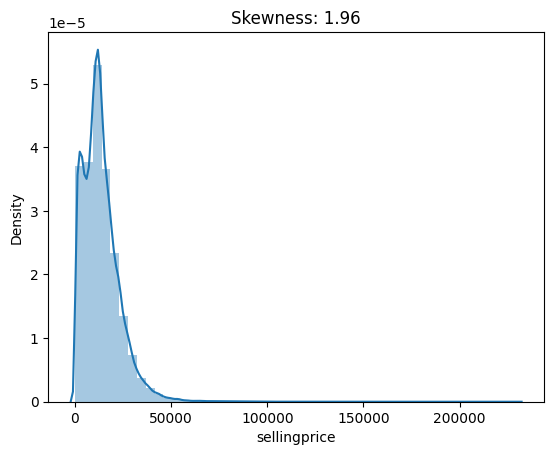

In [737]:
sns.distplot((ytrain))
plt.title(f'Skewness: {np.round(ytrain.skew(),2)}')


Text(0.5, 1.0, 'Skewness: 0.22')

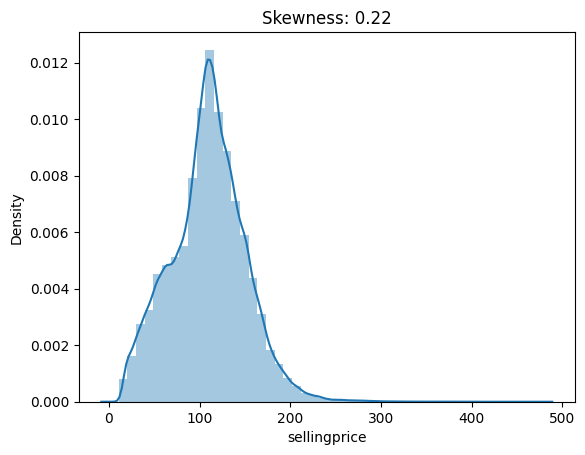

In [738]:
sns.distplot(np.sqrt(ytrain))
plt.title(f'Skewness: {np.round(np.sqrt(ytrain).skew(),2)}')


In [739]:
ytrain_tra=np.sqrt(ytrain)

Text(0.5, 1.0, 'Skewness: 1.9')

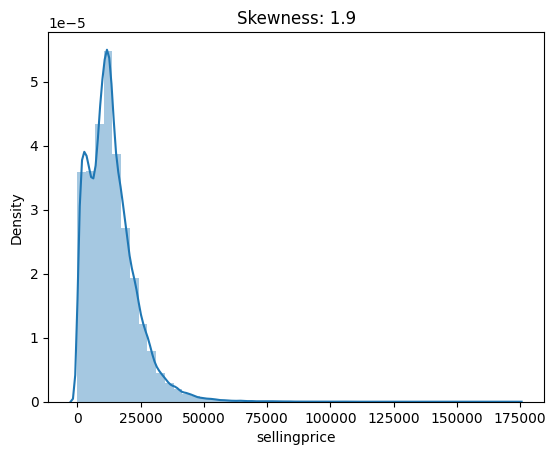

In [740]:
sns.distplot(ytest)
plt.title(f'Skewness: {np.round(ytest.skew(),2)}')

Text(0.5, 1.0, 'Skewness: 0.21')

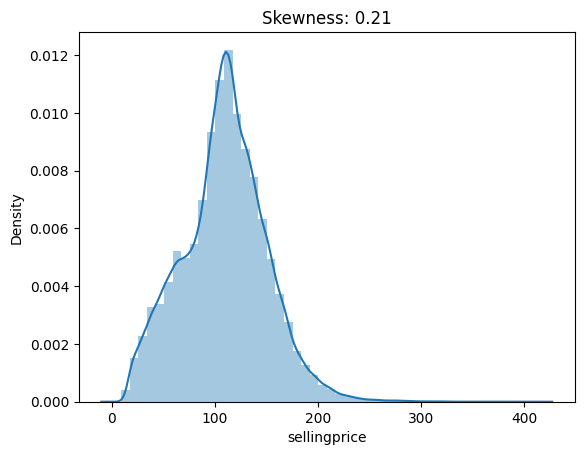

In [741]:
sns.distplot(np.sqrt(ytest))
plt.title(f'Skewness: {np.round(np.sqrt(ytest).skew(),2)}')

In [742]:
ytest_tra=np.sqrt(ytest)

## Linear Regression

### Assumptions of Linear Regression

**Before model building**

* Target Variable must be numeric.

In [743]:
ytrain.describe()

count    388762.000000
mean      13654.489297
std        9740.020027
min           1.000000
25%        7000.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

* Absence of Multicollinearity.

In [744]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [745]:
xtrain_final.shape

(388762, 17)

In [746]:
vif=[]
for i in range(xtrain_final.shape[1]):
    vif.append(variance_inflation_factor(xtrain_final.values,exog_idx=i))


In [747]:
pd.DataFrame(vif,xtrain_final.columns)

,0
year,122.101189
body_n,3.782898
trans_n,32.385909
state_0,1.040664
state_1,1.575498
state_2,2.238829
state_3,2.402294
state_4,2.229349
state_5,2.961760
cond_n,22.226084


In [748]:
xtrain_final=xtrain_final.drop(['country_manu','year'],axis=1)

In [749]:
vif=[]
for i in range(xtrain_final.shape[1]):
    vif.append(variance_inflation_factor(xtrain_final.values,exog_idx=i))


In [750]:
pd.DataFrame(vif,xtrain_final.columns)

,0
body_n,3.638973
trans_n,22.353212
state_0,1.040428
state_1,1.529091
state_2,2.222871
state_3,2.381213
state_4,2.167302
state_5,2.881632
cond_n,16.903238
odometer,7.062151


In [751]:
vif=[]
for i in range(xtrain_final_sc.shape[1]):
    vif.append(variance_inflation_factor(xtrain_final_sc.values,exog_idx=i))
pd.DataFrame(vif,xtrain_final_sc.columns)

,0
year,118.323569
body_n,3.782897
trans_n,32.385922
state_0,1.040665
state_1,1.575498
state_2,2.238828
state_3,2.402294
state_4,2.229350
state_5,2.961761
cond_n,22.225972


In [752]:
xtrain_final_sc=xtrain_final_sc.drop(['country_manu','year'],axis=1)

In [753]:
vif=[]
for i in range(xtrain_final_sc.shape[1]):
    vif.append(variance_inflation_factor(xtrain_final_sc.values,exog_idx=i))
pd.concat([pd.DataFrame(vif,xtrain_final_sc.columns),pd.DataFrame(vif,xtrain_final.columns)],axis=1)

,0,0
body_n,3.646613,3.646613
trans_n,21.620102,21.620102
state_0,1.039925,1.039925
state_1,1.524520,1.524520
state_2,2.222729,2.222729
state_3,2.380743,2.380743
state_4,2.163153,2.163153
state_5,2.885436,2.885436
cond_n,17.699821,17.699821
n_years,6.099351,20.561066


we can clearly see the difference in vif in scaled data and in unscaled data.

In [754]:
import statsmodels.api as sma

Now we make a base model on scaled data/normaled data and on unscaled data/unnormalised data. 

* **Modelling on unscaled data.**

In [755]:
xtrain_final_x=sma.add_constant(xtrain_final)
base_model=sma.OLS(ytrain,xtrain_final_x).fit()

In [756]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 8.059e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        20:02:15   Log-Likelihood:            -3.8473e+06
No. Observations:              388762   AIC:                         7.695e+06
Df Residuals:                  388746   BIC:                         7.695e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2787.3996     78.774    -35.385      0.000   -2941.795   -2633.004
body_n         -1824.5827     46.517    -39.224      0.000   -1915.755   -1733.410
trans_n          546.3360     44.531     12.269      0.000     459.057     633.615
state_0          803.4554     74.769     10.746      0.000     656.910     950.001
state_1         -188.5245     20.871     -9.033      0.000    -229.431    -147.618
state_2         -294.9278     17.628    -16.730      0.000    -329.479    -260.377
state_3          232.6803     17.302     13.448      0.000     198.769     266.592
state_4           23.9918     16.435      1.460      0.144      -8.221      56.204
state_5          238.0693     17.212     13.832      0.000     204.334     271.804
cond_n           154.3138      1.025    150.501      0.000     152.304     156.323
odometer          -0.0412      0.000   -171.912      0.000      -0.042      -0.041
n_years         -428.5951      3.381   -126.755      0.000    -435.222    -421.968
make_n             0.0532      0.002     21.603      0.000       0.048       0.058
model_n            0.6009      0.002    341.401      0.000       0.597       0.604
trim_n             0.4200      0.002    249.950      0.000       0.417       0.423
color+interior     0.0937      0.003     34.802      0.000       0.088       0.099
==============================================================================
Omnibus:                   333425.833   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46537352.467
Skew:                           3.519   Prob(JB):                         0.00
Kurtosis:                      56.136   Cond. No.                     9.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **Modelling on scaled data.**

In [757]:
xtrain_final_sc_x=sma.add_constant(xtrain_final)
base_model_sc_df=sma.OLS(ytrain_tra,xtrain_final_sc_x).fit()
base_model_sc_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.464e+05
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        20:02:15   Log-Likelihood:            -1.6274e+06
No. Observations:              388762   AIC:                         3.255e+06
Df Residuals:                  388746   BIC:                         3.255e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             51.9367      0.261    199.040      0.000      51.425      52.448
body_n           -10.2999      0.154    -66.845      0.000     -10.602      -9.998
trans_n            3.6143      0.148     24.502      0.000       3.325       3.903
state_0            1.9063      0.248      7.697      0.000       1.421       2.392
state_1           -0.9171      0.069    -13.266      0.000      -1.053      -0.782
state_2           -1.7399      0.058    -29.796      0.000      -1.854      -1.625
state_3            1.1306      0.057     19.726      0.000       1.018       1.243
state_4            0.7404      0.054     13.600      0.000       0.634       0.847
state_5            1.3554      0.057     23.773      0.000       1.244       1.467
cond_n             0.7296      0.003    214.808      0.000       0.723       0.736
odometer          -0.0002   7.93e-07   -239.780      0.000      -0.000      -0.000
n_years           -3.0450      0.011   -271.866      0.000      -3.067      -3.023
make_n             0.0002   8.15e-06     23.742      0.000       0.000       0.000
model_n            0.0023   5.83e-06    389.132      0.000       0.002       0.002
trim_n             0.0014   5.57e-06    253.441      0.000       0.001       0.001
color+interior     0.0004   8.92e-06     49.397      0.000       0.000       0.000
==============================================================================
Omnibus:                    75106.261   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           500215.066
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       8.341   Cond. No.                     9.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the performance metric r2_score is maximum on scaled data we will use that one only.

#### Assumptions after the model

**Linear relationship between independent and dependent.**

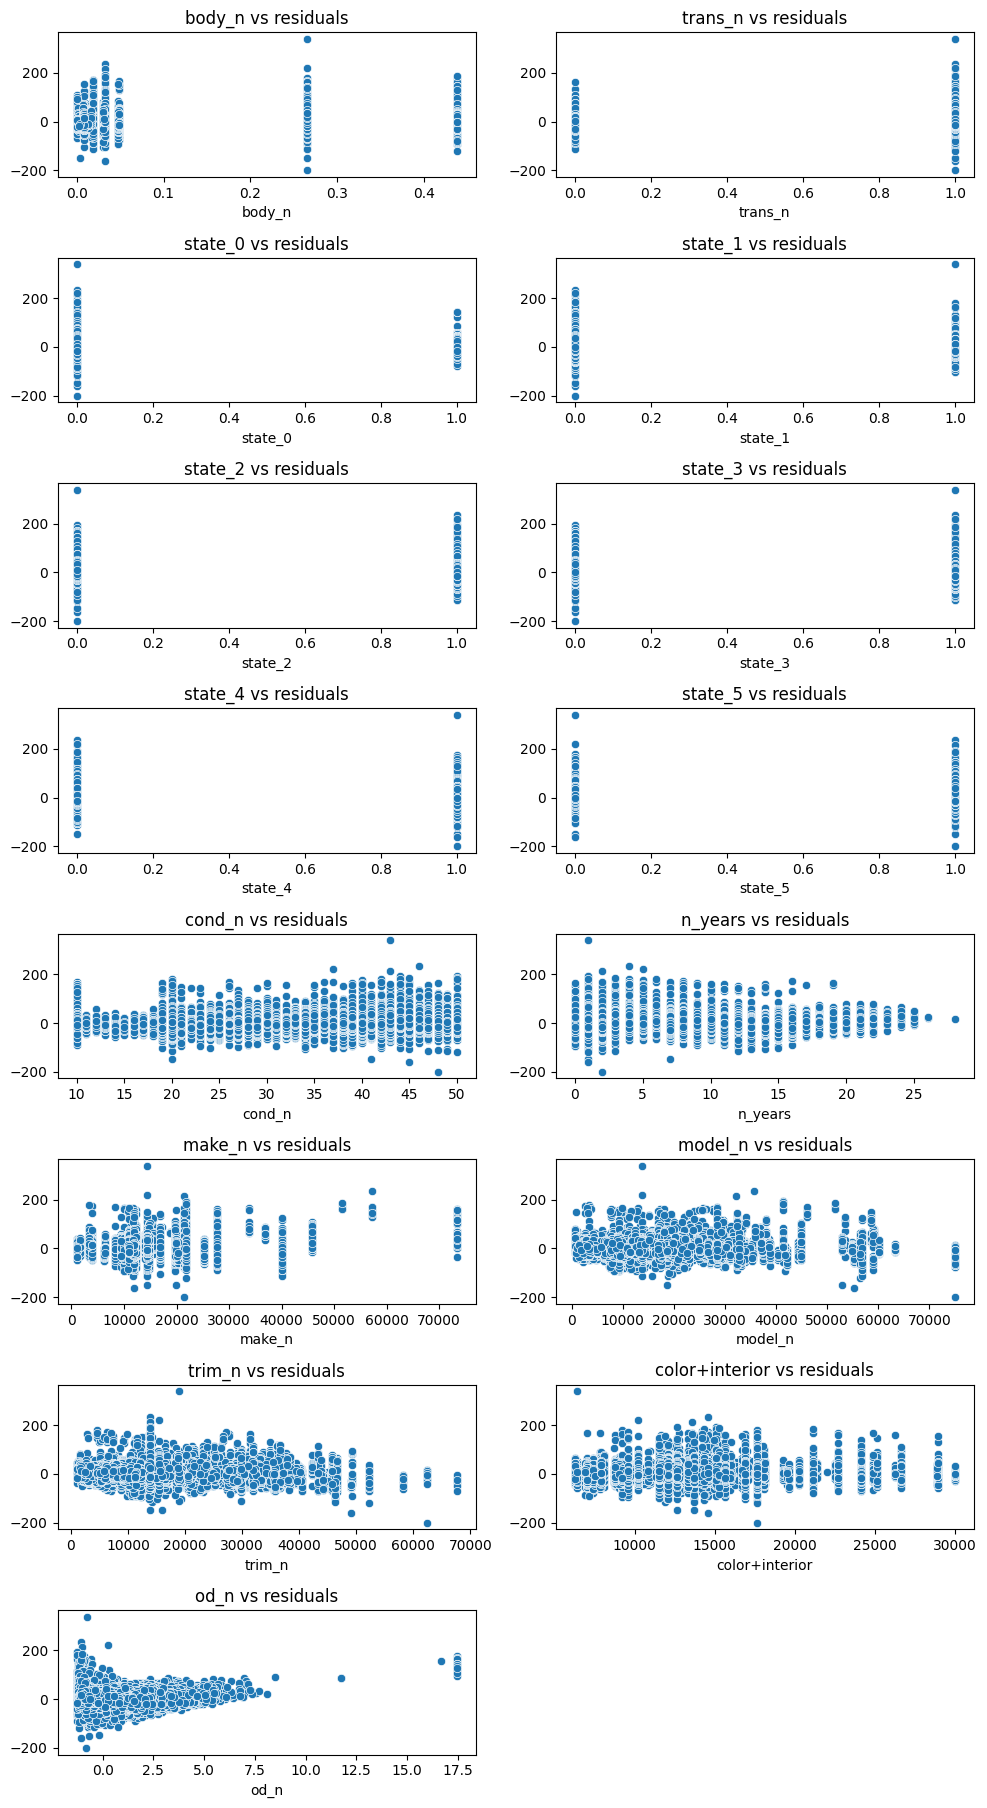

In [758]:
plt.figure(figsize=(10,20))
t=1
for i in xtrain_final_sc:
    plt.subplot(9,2,t)
    sns.scatterplot(x=xtrain_final_sc[i],y=base_model_sc_df.resid)
    plt.title(f'{i} vs residuals')
    t+=1
plt.tight_layout()
plt.show()
    

In [759]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(base_model_sc_df)

(0.992770483609645, 0.9451397460695002)

* Null rejected.
* There is no linear relationship bw independent and dependent variables.

**Absence of Auto-Collinearity**
* Durbin Watson : 1.998
* Assumption of absence of auto collinearity true.

**Homoskedasticity of errors.**

In [760]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(base_model_sc_df.resid,base_model_sc_df.model.exog)

(21257.83481033696, 0.0, 1499.102873553263, 0.0)

* The statistical test rejects the null hypothesis of hetroskedasticity.
* The error terms are homoskedastic.

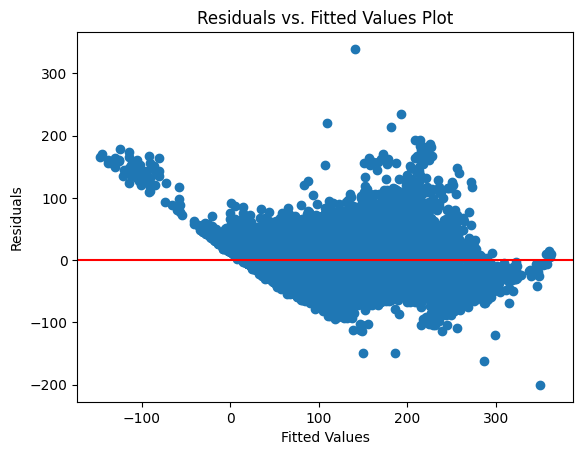

In [761]:
residuals = base_model_sc_df.resid
fitted_values = base_model_sc_df.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

* The graphical representation shows presence of heteroskedasticity in the error terms.
* Assumption : Error terms must be normally distributed

In [762]:
import scipy.stats as stats

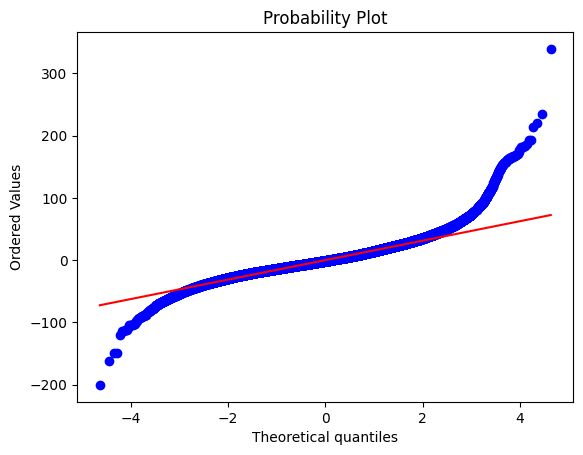

In [763]:
stats.probplot(base_model_sc_df.resid,plot=plt)
plt.show()

* The error terms are not normally distributed.

### Checking performance of the base model on the train set.

# Creating Function for validation: 

In [764]:
from sklearn.metrics import r2_score, mean_squared_error

def validation(test,pred):
    print(f'R-Squared : {r2_score(test,pred)}')
    print(f'Mean Squared Error : {mean_squared_error(test,pred)}')
    print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(test,pred))}')

In [765]:
ytrain_pred=base_model.predict(xtrain_final_x)

In [766]:
validation(ytrain,ytrain_pred)

R-Squared : 0.7566671936285946
Mean Squared Error : 23084434.893627986
Root Mean Squared Error : 4804.626405208628


### Checking performance of the base model on the test set.

In [767]:
xtest_final=xtest_final.drop(['year','country_manu'],axis=1)

In [768]:
xtest_final_x=sma.add_constant(xtest_final)
ytest_pred=base_model.predict(xtest_final_x)

In [769]:
validation(ytest,ytest_pred)

R-Squared : 0.7566028096401838
Mean Squared Error : 22892994.78909609
Root Mean Squared Error : 4784.6624529945775


**R2 is still the same showing absence of overfitting.**

* Here, we will do cross validation.

In [770]:
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [771]:
lr=LinearRegression()
cv = KFold(n_splits=5,shuffle=True,random_state=1001)
scores = cross_val_score(estimator=lr,X =xtrain_final, y = ytrain, cv=cv, scoring='r2', n_jobs=-1)
scores

array([0.75688371, 0.75712775, 0.75674331, 0.75723392, 0.75519206])

In [772]:
xtrain_final

,body_n,trans_n,state_0,state_1,state_2,state_3,state_4,state_5,cond_n,odometer,n_years,make_n,model_n,trim_n,color+interior
113209,0.437380,1,0,0,0,0,1,0,37.0,43491.0,4,11741.153611,13063.662728,16645.762260,14969.272774
12723,0.437380,1,0,0,1,1,1,1,29.0,97788.0,4,11741.153611,13063.662728,12860.065028,15616.942353
474099,0.007375,1,0,1,0,0,1,0,28.0,151287.0,12,11017.354171,19387.905141,15372.762419,11871.874488
384159,0.032180,0,0,0,0,0,0,1,29.0,117356.0,11,20291.985033,6870.396419,13847.861295,15616.942353
185076,0.031730,1,0,0,1,0,0,0,10.0,171547.0,10,14385.211268,2818.658637,14229.070679,12659.709636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299741,0.047271,1,0,0,1,1,1,1,39.0,56751.0,3,10999.206417,13236.284289,13847.861295,12611.934505
533660,0.265471,1,0,0,0,0,1,0,36.0,48579.0,3,14385.211268,15207.865795,23622.857143,22681.927900
105595,0.031730,1,0,1,0,1,0,0,29.0,99351.0,9,10892.970787,3126.086957,5756.080829,11504.018906
443712,0.437380,1,0,0,1,0,1,0,38.0,35002.0,3,10999.206417,10898.388528,11181.899367,17638.677342


In [773]:
# base model
def base_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['DTREE'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['GBM'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    models['ADA'] = AdaBoostRegressor()
    return models

In [774]:
from sklearn.model_selection import KFold,cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model,X =xtrain_final,y = ytrain,cv=cv,scoring='r2',
                            n_jobs=-1)
    return scores




In [775]:
# lets use the functions to calculate the scores........

models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 0.7566361516838798
DTREE 0.8327061974278285
RF 0.8732433237370761
GBM 0.8743318618981579
XGB 0.888786183150991
ADA 0.7089839106952925


In [776]:
dt = DecisionTreeRegressor()
dt.fit(xtrain_final, ytrain)
dtpred = dt.predict(xtest_final)
validation(ytest, dtpred)

R-Squared : 0.918970459240054
Mean Squared Error : 7621324.024480383
Root Mean Squared Error : 2760.674559682902


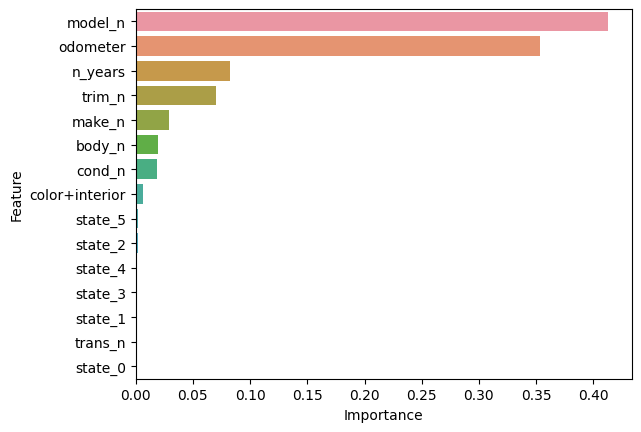

In [777]:
feature_imp = pd.DataFrame()
feature_imp['Feature']=xtrain_final.columns
feature_imp['Importance']=dt.feature_importances_

feature_imp = feature_imp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.show()

## Ensemble Modelling

In [778]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(xtrain_final, ytrain)
rfpred = rf.predict(xtest_final)
validation(ytest, rfpred)

R-Squared : 0.9566393341875017
Mean Squared Error : 4078335.888059384
Root Mean Squared Error : 2019.4890165730994


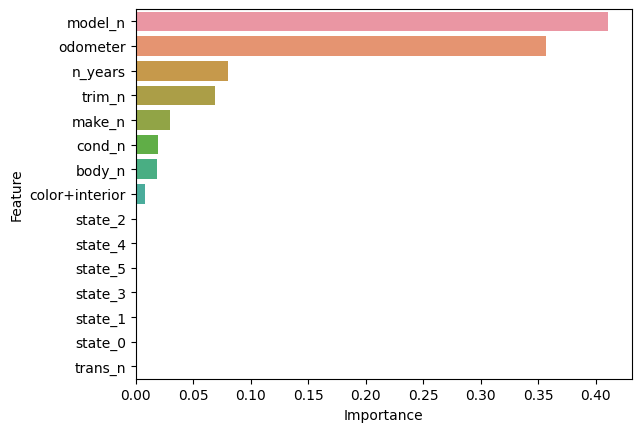

In [779]:
feature_imp = pd.DataFrame()
feature_imp['Feature']=xtrain_final.columns
feature_imp['Importance']=rf.feature_importances_

feature_imp = feature_imp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.show()

In [780]:
gbm = GradientBoostingRegressor()
gbm.fit(xtrain_final, ytrain)
gbmpred = gbm.predict(xtest_final)
validation(ytest, gbmpred)

R-Squared : 0.8738686387508068
Mean Squared Error : 11863426.161784053
Root Mean Squared Error : 3444.3324696933732


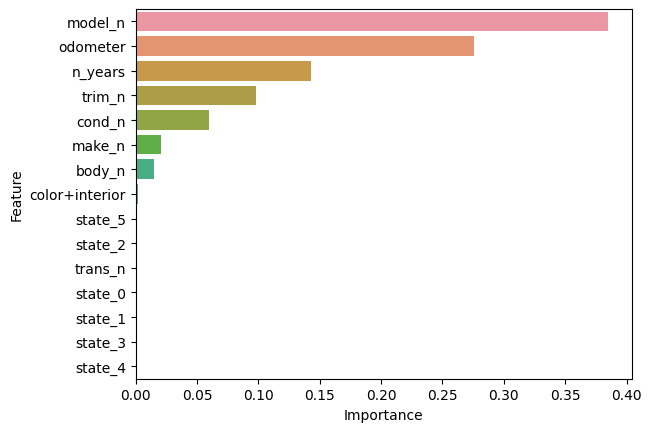

In [781]:
feature_imp = pd.DataFrame()
feature_imp['Feature']=xtrain_final.columns
feature_imp['Importance']=gbm.feature_importances_

feature_imp = feature_imp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.show()

In [782]:
adb = AdaBoostRegressor()
adb.fit(xtrain_final, ytrain)
adbpred = adb.predict(xtest_final)
validation(ytest, adbpred)

R-Squared : 0.3379545201494609
Mean Squared Error : 62269427.588533215
Root Mean Squared Error : 7891.09799638385


In [783]:
xgb = XGBRegressor()
xgb.fit(xtrain_final, ytrain)
xgbpred = xgb.predict(xtest_final)
validation(ytest, xgbpred)

R-Squared : 0.9459768054784659
Mean Squared Error : 5081211.943504779
Root Mean Squared Error : 2254.1543743729662


In [784]:
import pickle

model_rf = (rf)

# Save the tuple to a pickle file
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

SyntaxError: invalid non-printable character U+00A0 (3404352253.py, line 7)

* **we conclude that our final model is Random Forest Because of simplicity and better performance.**

**Using Random Forest Our performance is:**

* R-Squared : 0.9566393341875017

* Mean Squared Error : 4078335.888059384

* Root Mean Squared Error : 2019.4890165730994

# ***Thank you!...***